In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import classification_report,f1_score,confusion_matrix

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, LabelEncoder

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.compose import ColumnTransformer

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

from sys import path 
path.insert(0, 'D:/python/PROJECTS/GIT/ML-Basic/')

In [52]:
#######################################################
'''         IMPORTING FROM CUSTOM MODULE            '''
#######################################################
from quick_EDA import analysis_quant, analysis_cate, handle_outliers, correlation, multiplot

# About dataset

### loading dataset

In [53]:
list1=['4th period', '3rd period', '2nd period', '1st period', 'all period', 'Time frame']
df_dict={}

In [54]:
for i in list1:
    df_dict[i]= pd.read_excel('stock_portfolio_performance.xlsx', skiprows=[0], sheet_name=i)

### Time frame

In [55]:
df_time_frame=df_dict['Time frame']
df_time_frame.head()

,The all-period,1990/9/30,2010/6/30,80 quarters (20 years)
0,The 1st period,1990/9/30,1995/6/30,20 quarters (5 years)
1,The 2nd period,1995/9/30,2000/6/30,20 quarters (5 years)
2,The 3rd period,2000/9/30,2005/6/30,20 quarters (5 years)
3,The 4th period,2005/9/30,2010/6/30,20 quarters (5 years)


### Data dictionary

In [56]:
all_columns=['Large B/P',
             'Large ROE',
             'Large S/P',
             'Large Return Rate in the last quarter',
             'Large Market Value',
             'Small systematic Risk',
             'Annual Return',
             'Excess Return',
             'Systematic Risk',
             'Total Risk',
             'Abs. Win Rate',
             'Rel. Win Rate'
]

description=['Book value to price , Total assets − Total liabilities',
             'Return on equity, roe=net income/avg shareholders equity',
             'The price-to-sales ratio, valuation ratio that compares a company’s stock price to its revenues',
             'net gain or loss of an investment over a specified time period',
             'price an asset would fetch in the marketplace',
             'refers to the risk inherent to the entire market or market segment',
             'the return that an investment provides over a period of time',
             'used to denote how a fund has performed compared to a benchmark',
             'Original systematic risk',
             "Risk is defined in financial terms as the chance that an outcome or investment's actual gains will differ from an expected outcome or return",
             'Absolute Win Rate, refers to the rate at which a sales team turns opportunities into customers',
             'Relative win rate',
]

dict1={'Feature':all_columns,
       'Description':description,
      }

data_dict=pd.DataFrame(dict1)

data_dict

,Feature,Description
0,Large B/P,"Book value to price , Total assets − Total lia..."
1,Large ROE,"Return on equity, roe=net income/avg sharehold..."
2,Large S/P,"The price-to-sales ratio, valuation ratio that..."
3,Large Return Rate in the last quarter,net gain or loss of an investment over a speci...
4,Large Market Value,price an asset would fetch in the marketplace
5,Small systematic Risk,refers to the risk inherent to the entire mark...
6,Annual Return,the return that an investment provides over a ...
7,Excess Return,used to denote how a fund has performed compar...
8,Systematic Risk,Original systematic risk
9,Total Risk,Risk is defined in financial terms as the chan...


### all period analysis

In [57]:
df_all=df_dict['all period'].iloc[:,:13].set_index('ID', drop=True)
df_all.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
ID,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.139,0.010,1.33,0.149,0.663,0.525
2,0.0,1.0,0.0,0.0,0.0,0.0,0.143,0.010,1.17,0.108,0.663,0.650
3,0.0,0.0,1.0,0.0,0.0,0.0,0.173,0.018,1.30,0.144,0.638,0.513
4,0.0,0.0,0.0,1.0,0.0,0.0,0.096,-0.002,1.39,0.144,0.613,0.475
5,0.0,0.0,0.0,0.0,1.0,0.0,0.096,0.001,1.04,0.087,0.725,0.538


In [58]:
list(df_all.columns)

[' Large B/P ',
 ' Large ROE ',
 ' Large S/P ',
 ' Large Return Rate in the last quarter ',
 ' Large Market Value ',
 ' Small systematic Risk',
 'Annual Return',
 'Excess Return',
 'Systematic Risk',
 'Total Risk',
 'Abs. Win Rate',
 'Rel. Win Rate']

[]

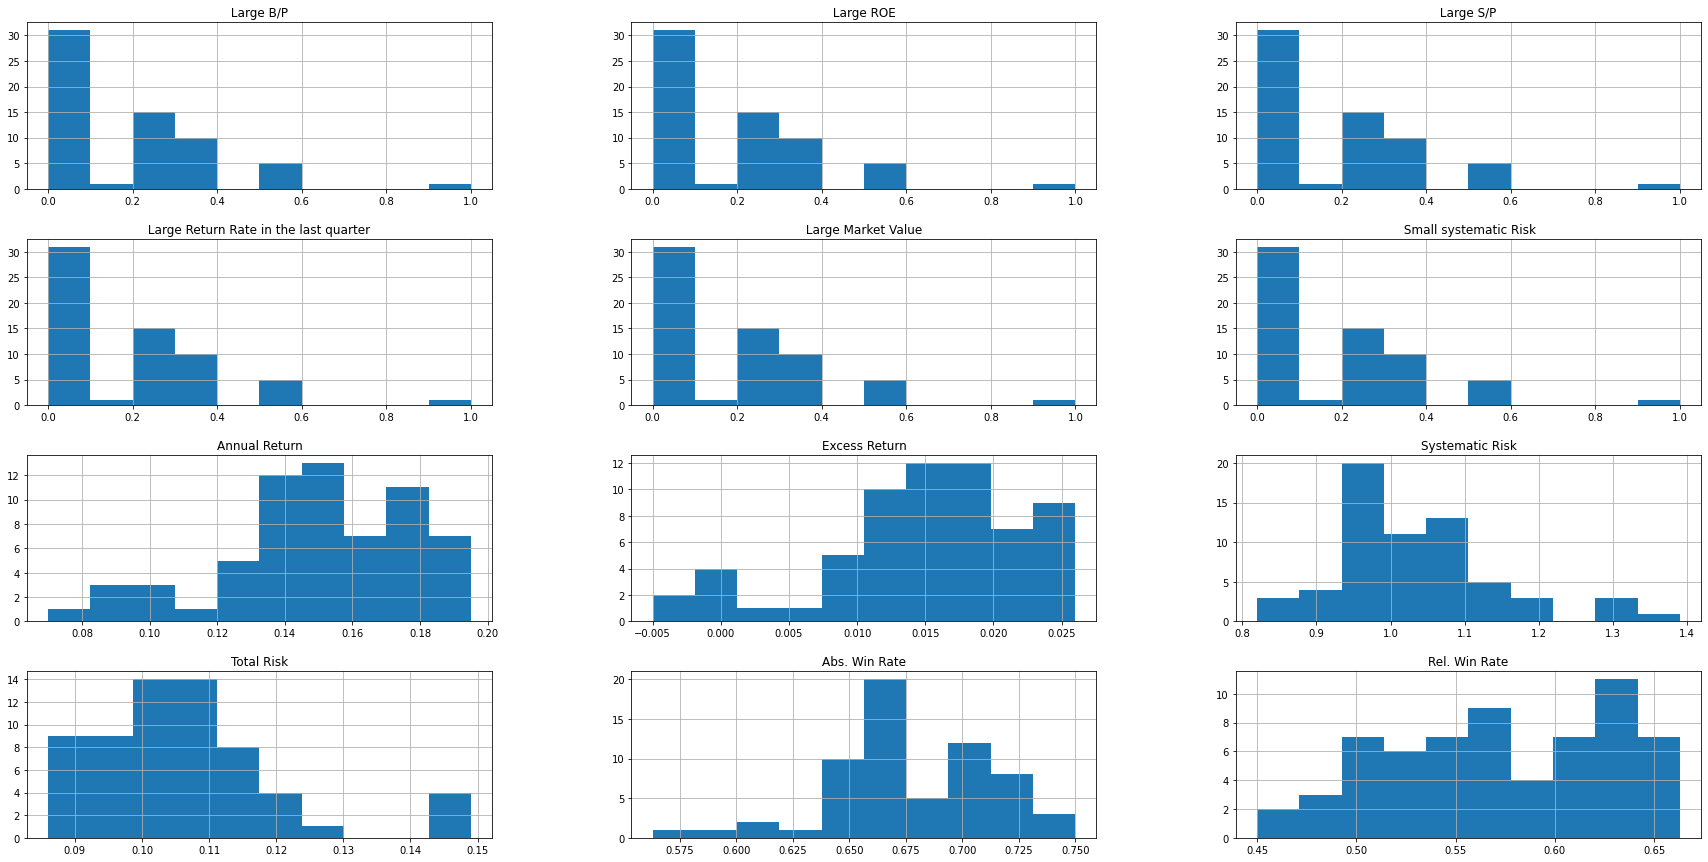

In [59]:
df_all.hist(figsize=(30,15))
plt.plot()

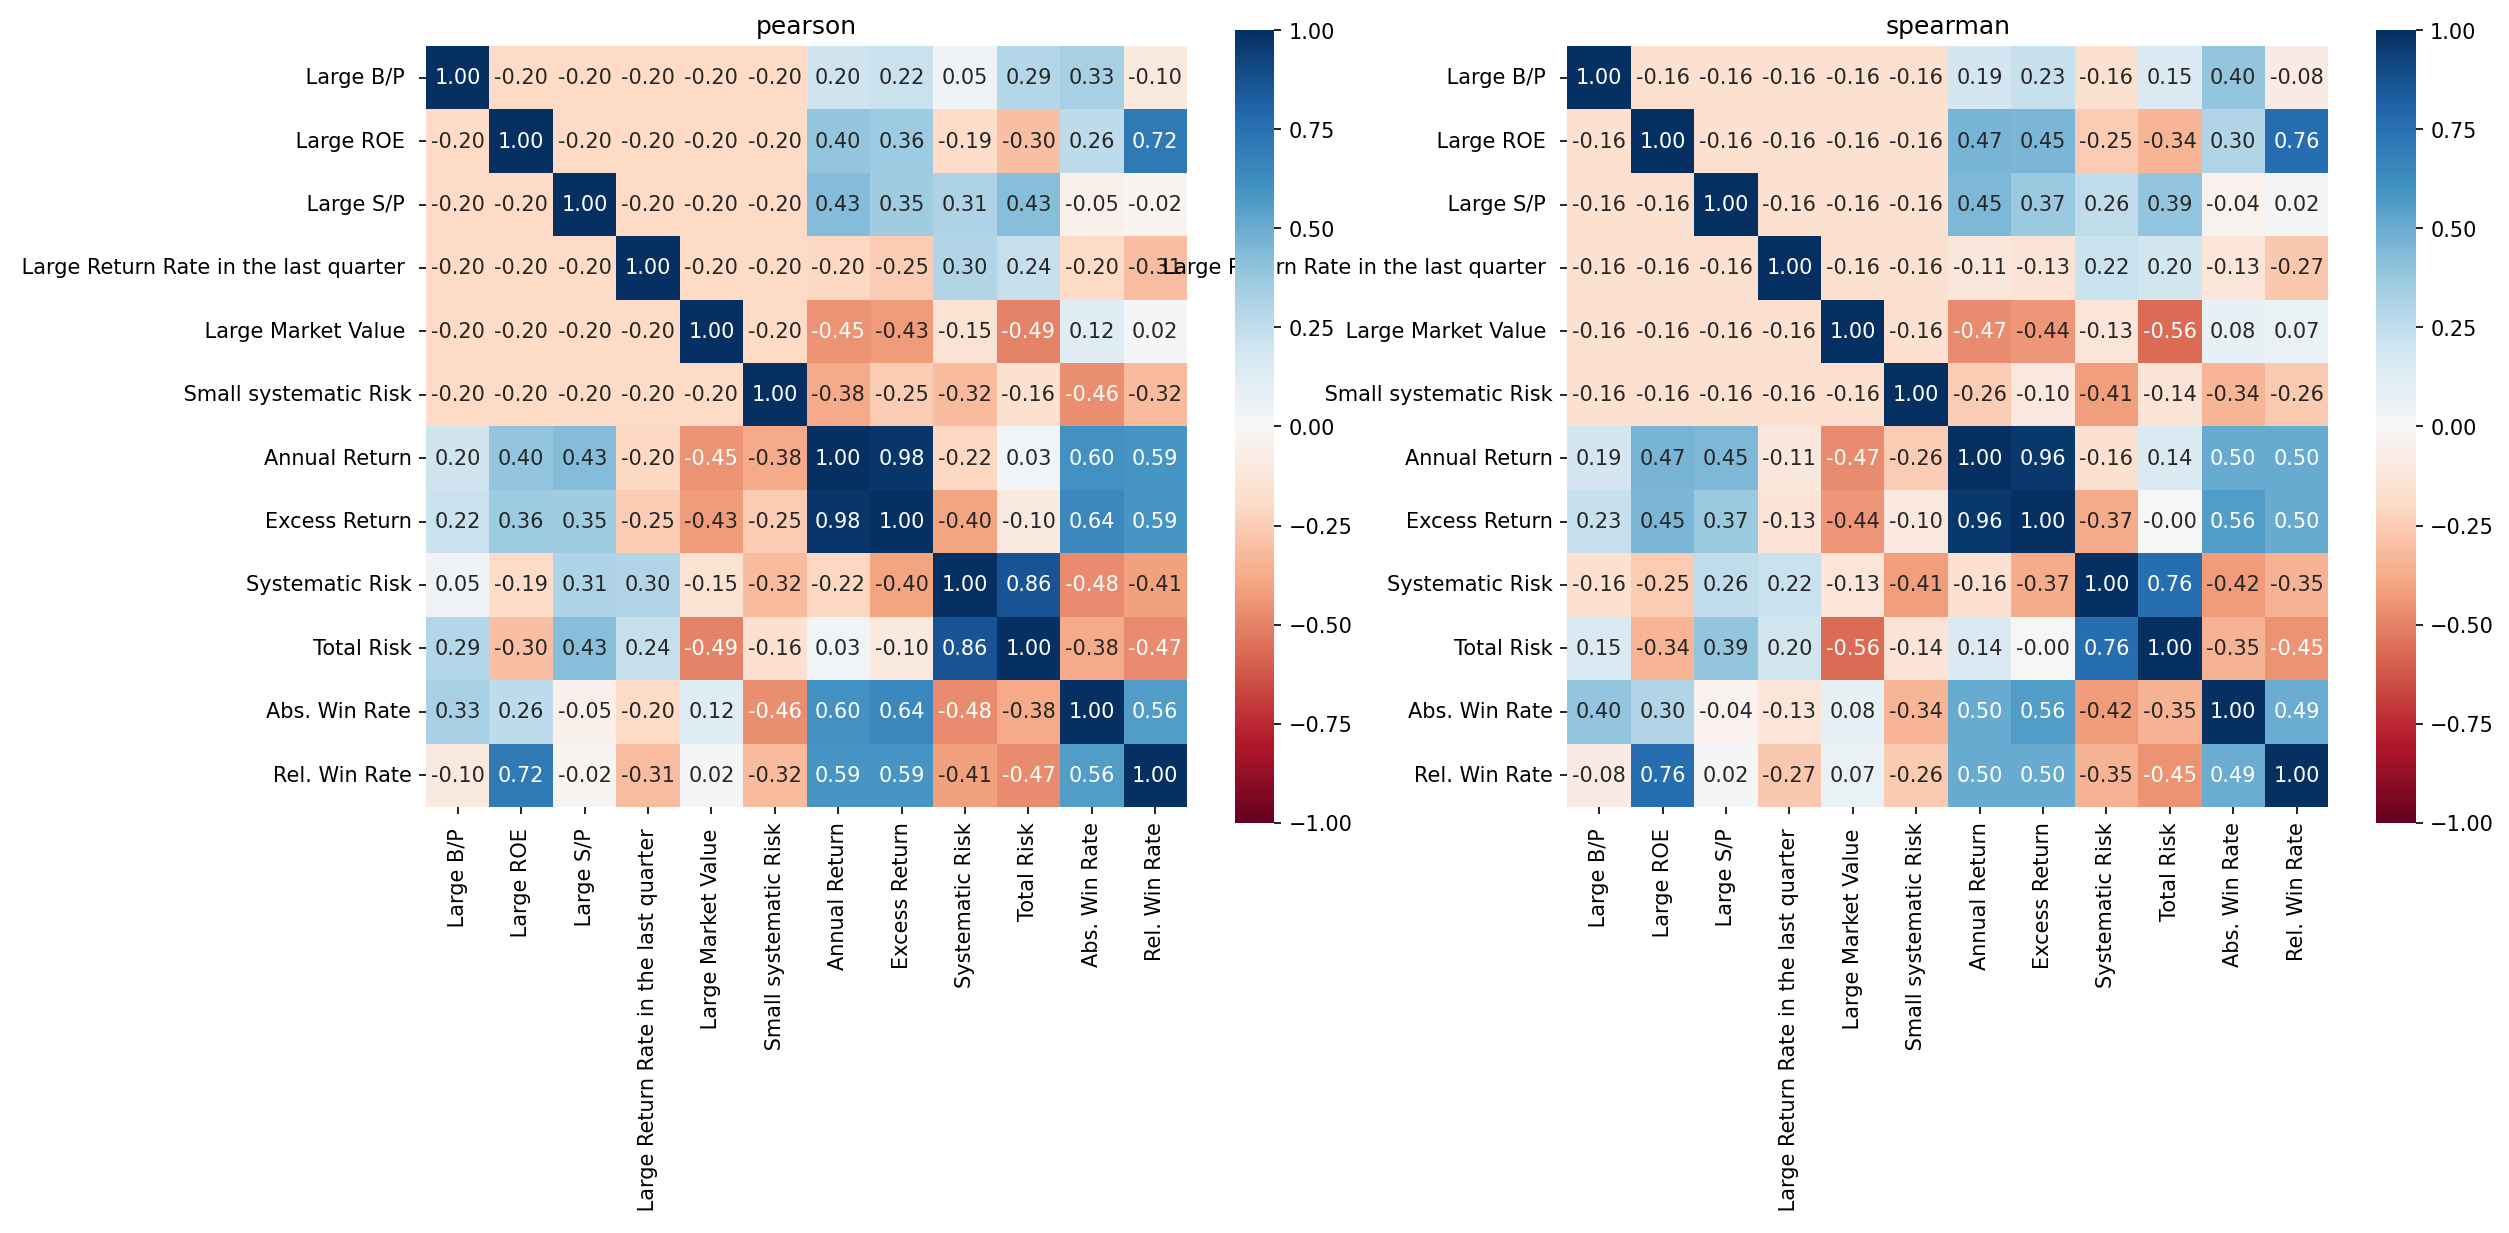

In [60]:
correlation(df_all, figsize=(18,7), dpi=150)

### 1st period analysis

In [61]:
df_1=df_dict['1st period'].iloc[:,:13].set_index('ID', drop=True)
df_1.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
ID,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.255357,0.020778,0.975575,0.081426,0.80,0.60
2,0.0,1.0,0.0,0.0,0.0,0.0,0.249602,0.003960,1.350801,0.077498,0.85,0.75
3,0.0,0.0,1.0,0.0,0.0,0.0,0.231246,0.013456,1.040006,0.087826,0.80,0.40
4,0.0,0.0,0.0,1.0,0.0,0.0,0.203809,-0.002600,1.291899,0.088624,0.70,0.60
5,0.0,0.0,0.0,0.0,1.0,0.0,0.163830,-0.000795,0.974706,0.046071,0.80,0.45


[]

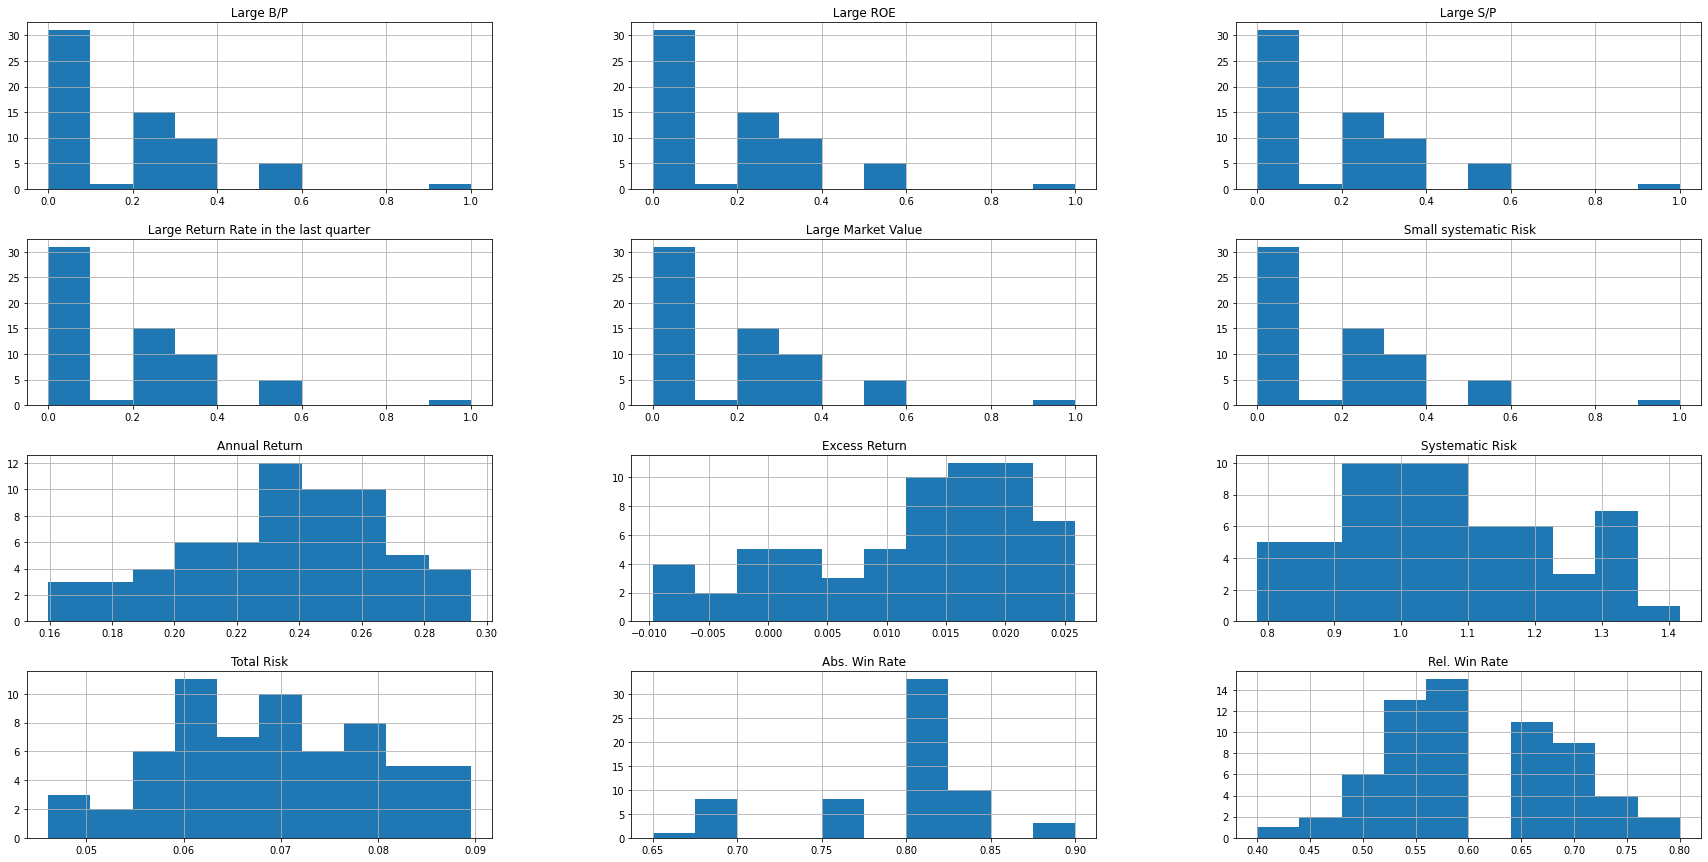

In [62]:
df_1.hist(figsize=(30,15))
plt.plot()

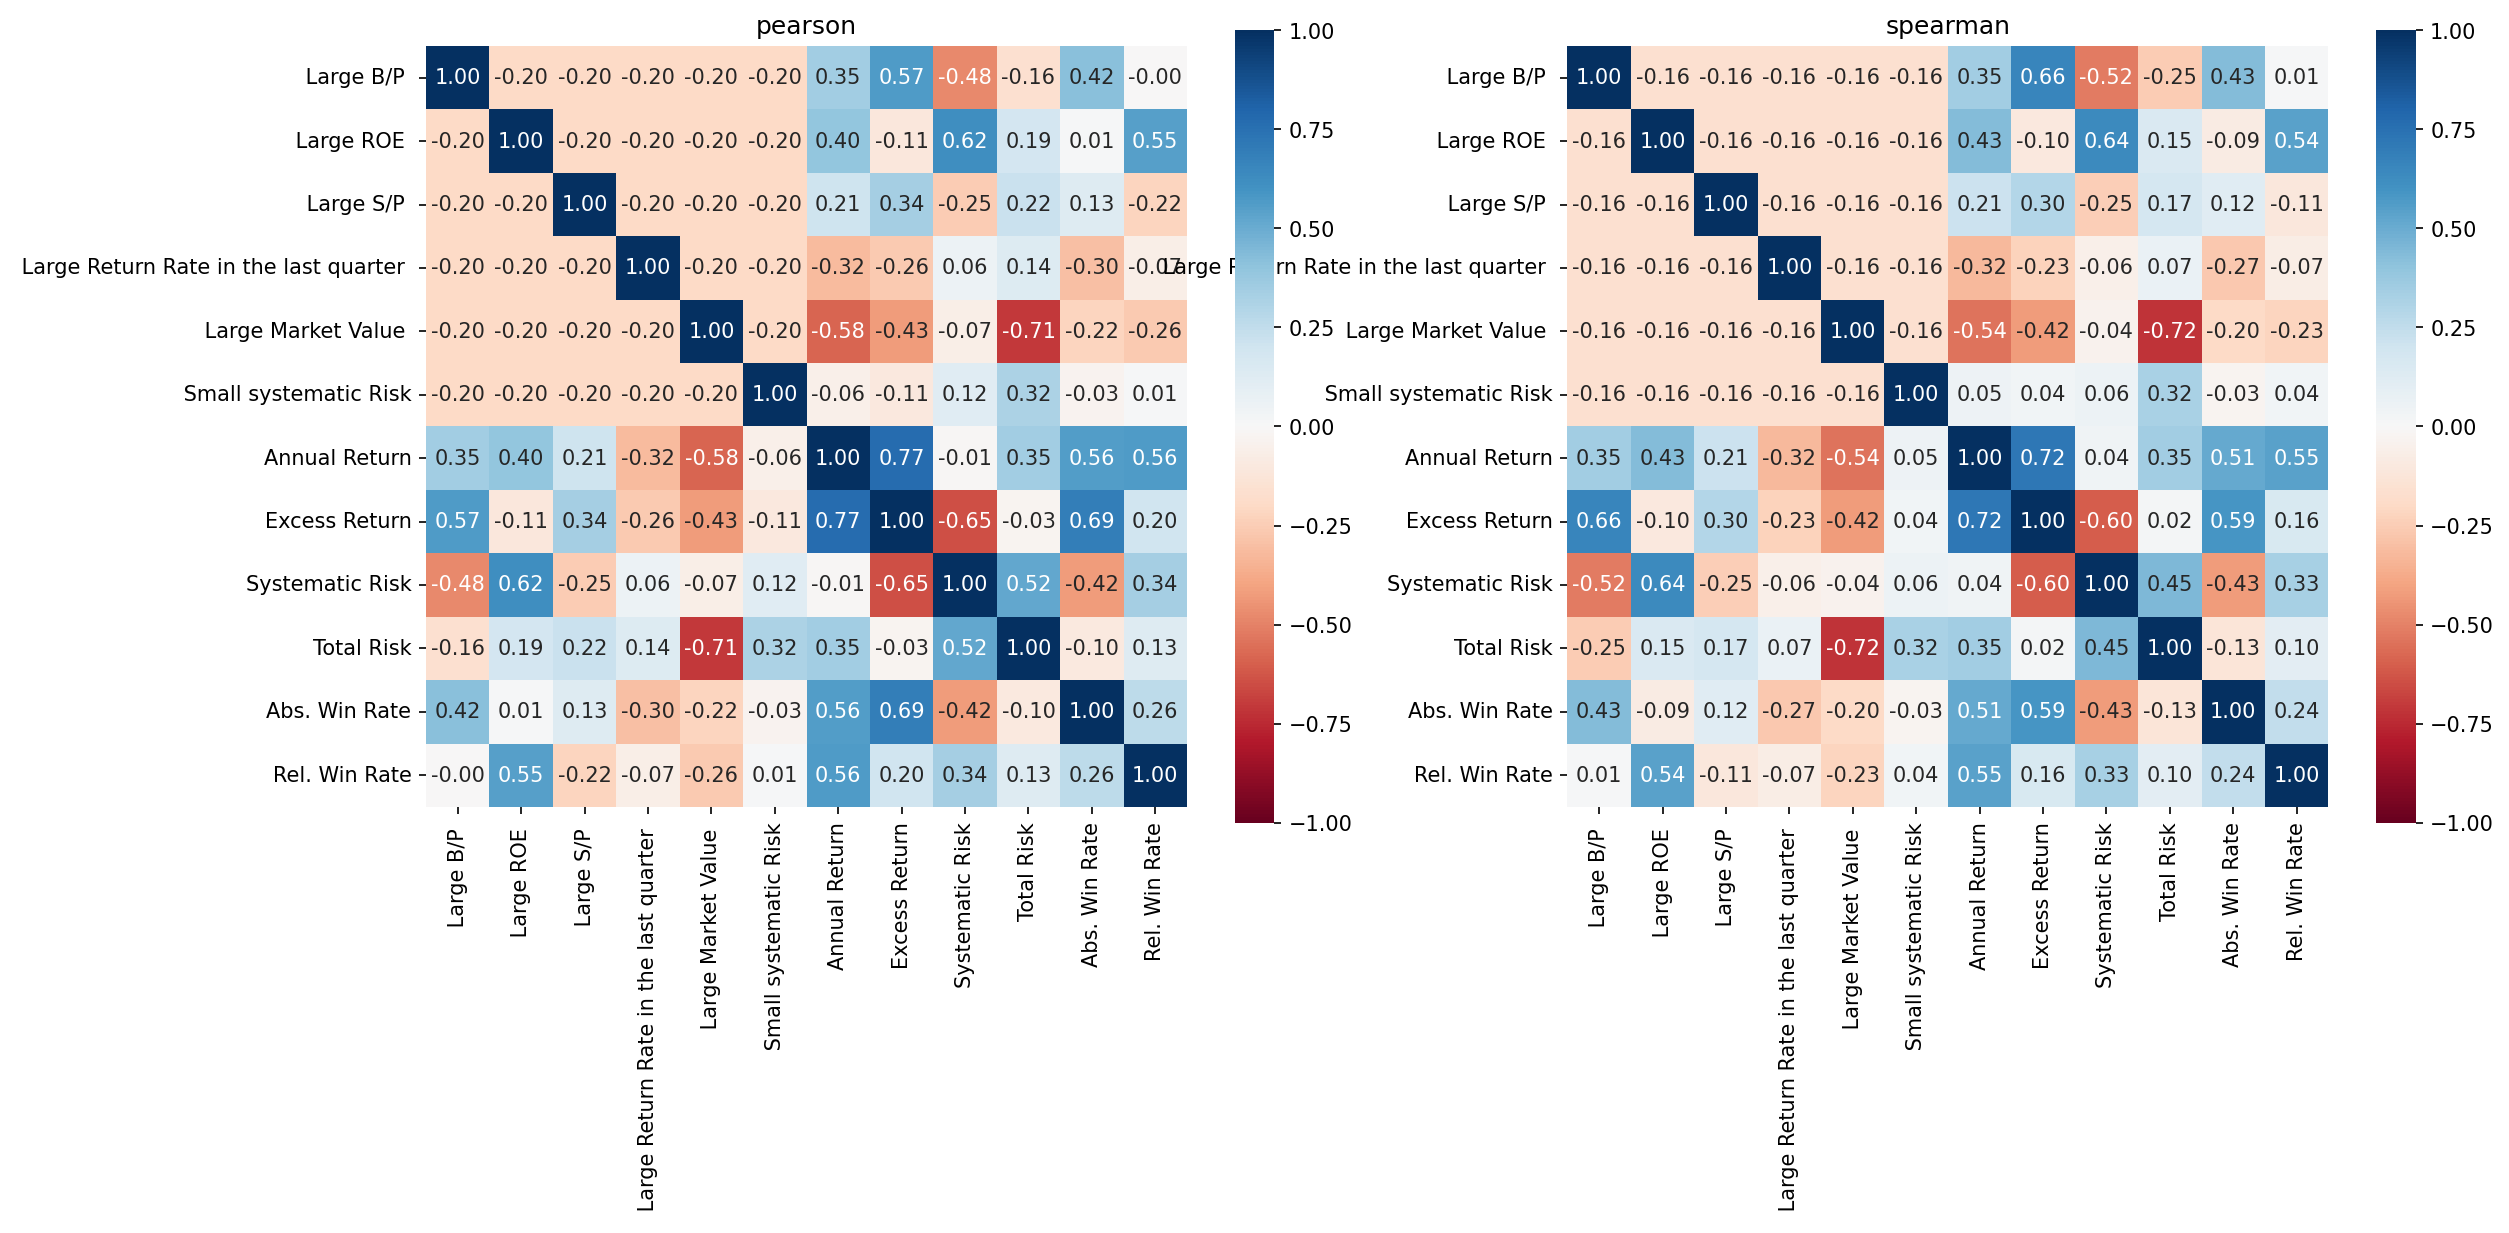

In [63]:
correlation(df_1, figsize=(18,7), dpi=150)

### 2nd period analysis

In [64]:
df_2=df_dict['2nd period'].iloc[:,:13].set_index('ID', drop=True)
df_2.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
ID,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.077004,-0.015932,0.736939,0.095878,0.60,0.30
2,0.0,1.0,0.0,0.0,0.0,0.0,0.167495,-0.017357,1.169841,0.103008,0.70,0.40
3,0.0,0.0,1.0,0.0,0.0,0.0,0.097648,-0.025967,1.049221,0.111338,0.55,0.30
4,0.0,0.0,0.0,1.0,0.0,0.0,0.203422,-0.016849,1.438916,0.164251,0.70,0.40
5,0.0,0.0,0.0,0.0,1.0,0.0,0.178471,-0.008925,1.016983,0.079385,0.85,0.25


[]

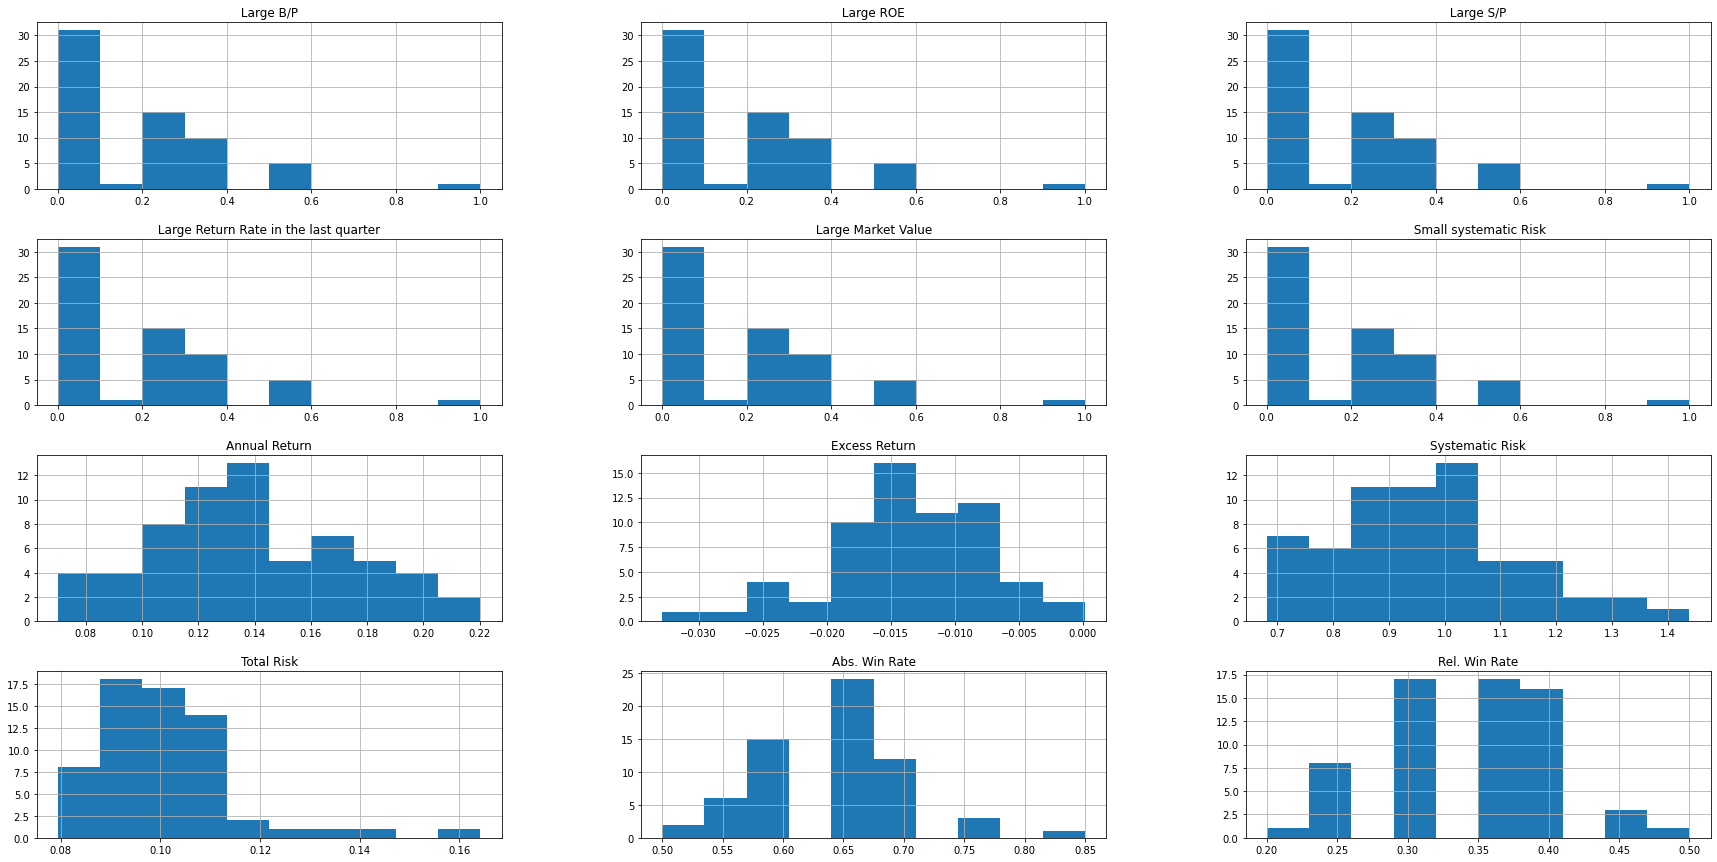

In [65]:
df_2.hist(figsize=(30,15))
plt.plot()

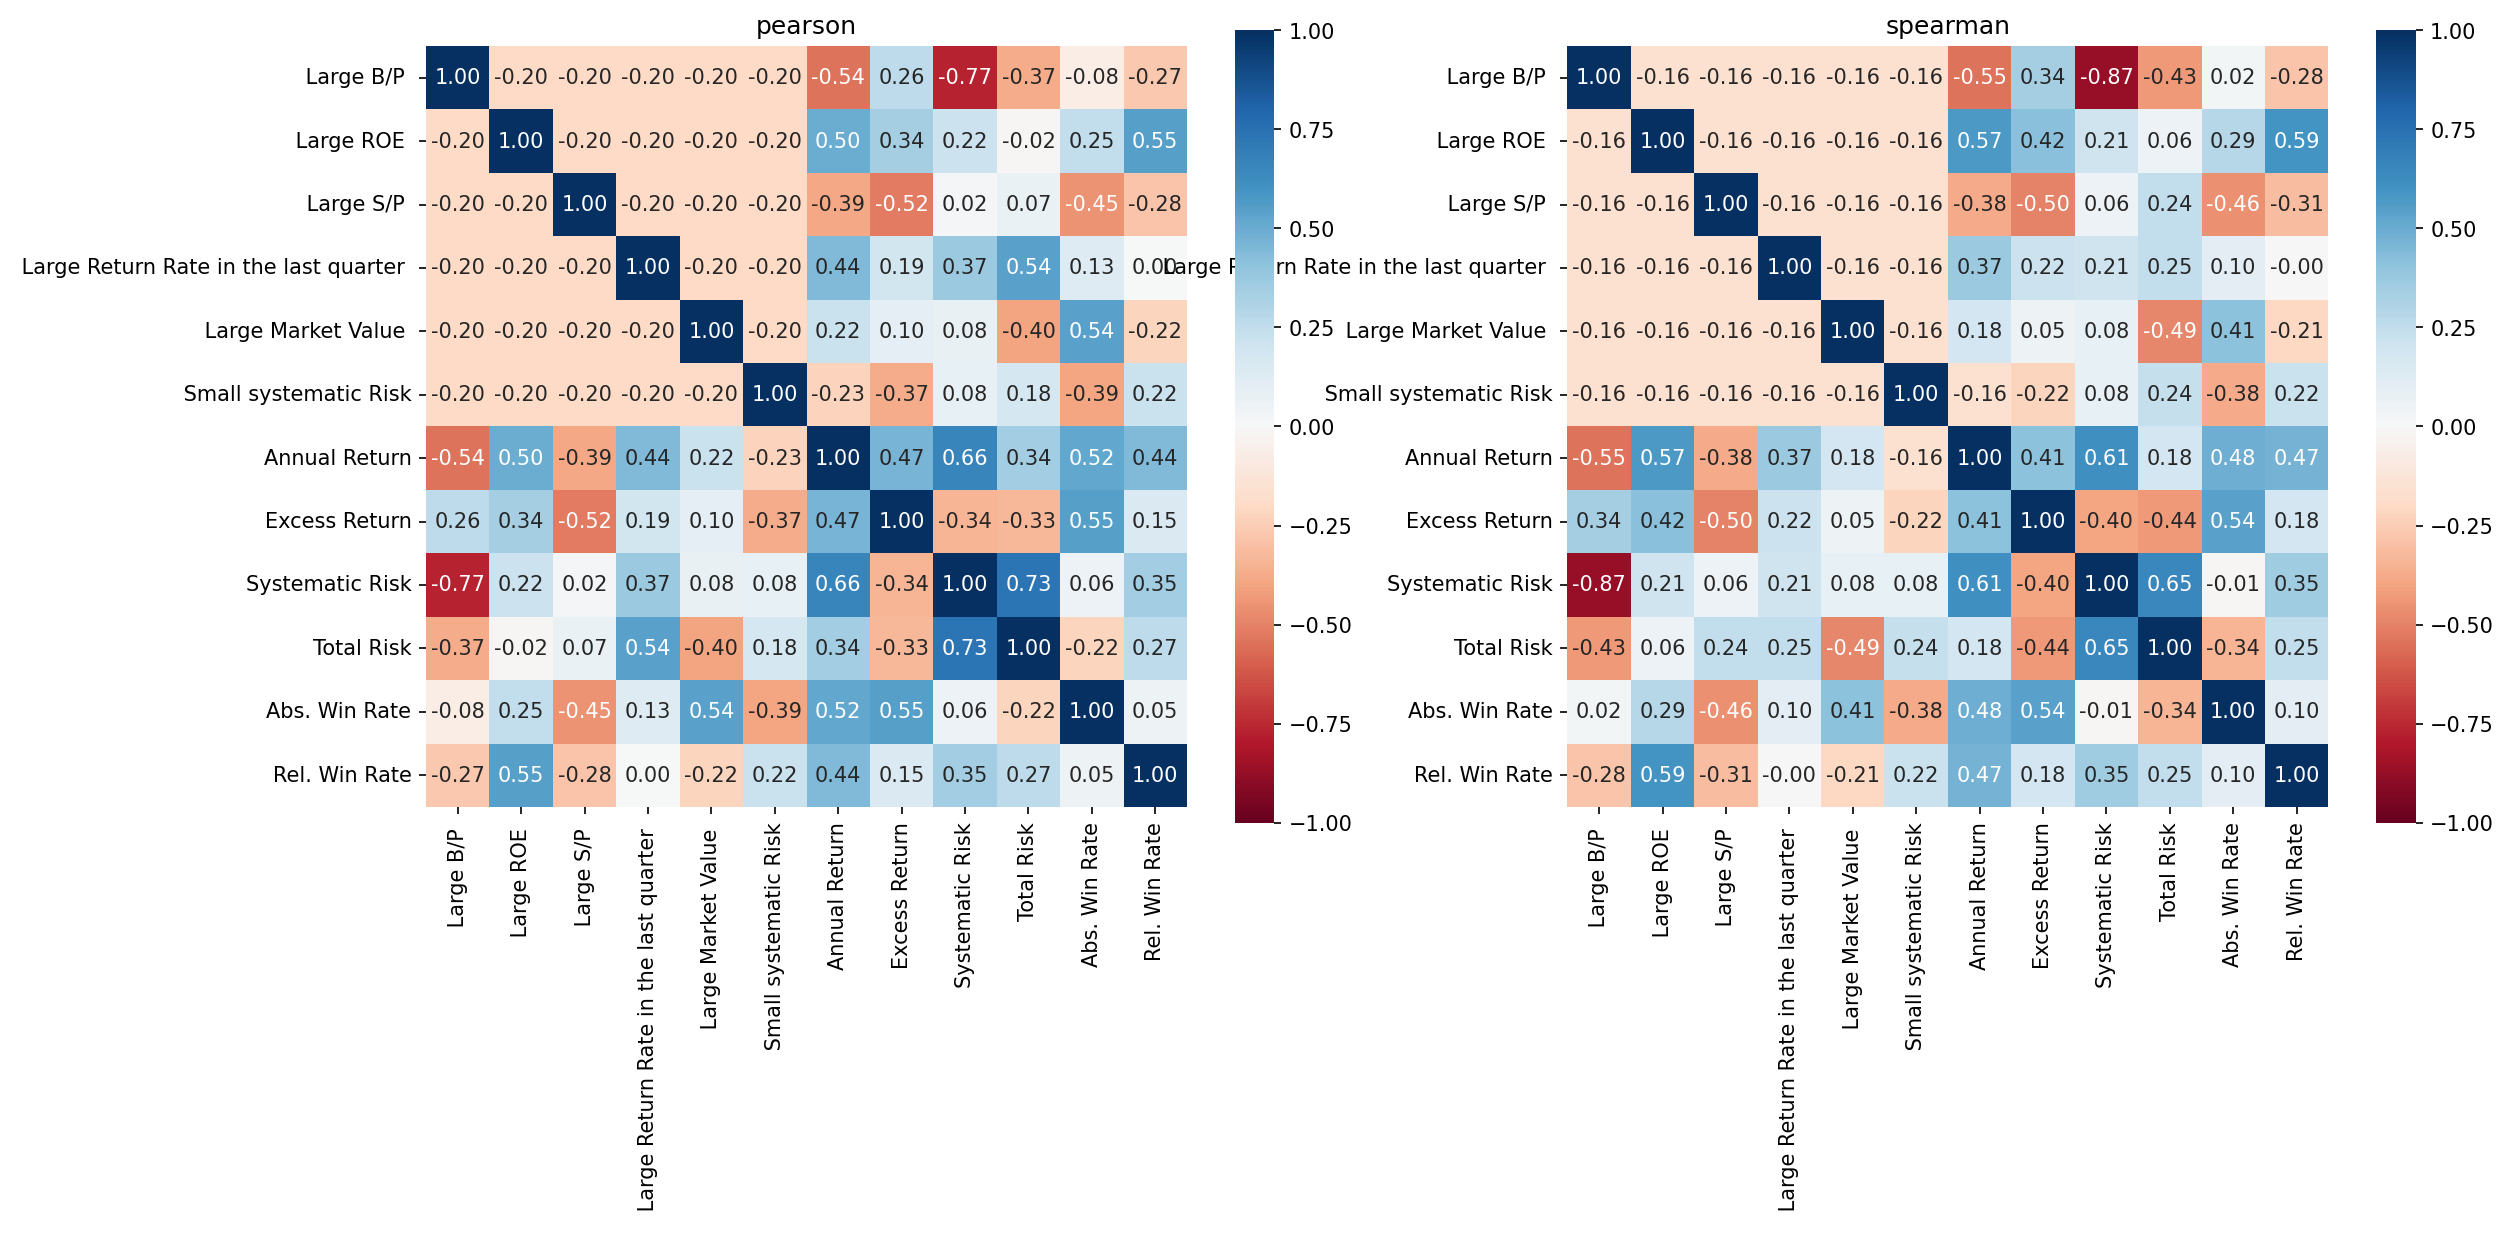

In [66]:
correlation(df_2, figsize=(18,7), dpi=150)

### 3rd period analysis

In [67]:
df_3=df_dict['3rd period'].iloc[:,:13].set_index('ID', drop=True)
df_3.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
ID,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.221805,0.062884,1.580440,0.164360,0.65,0.80
2,0.0,1.0,0.0,0.0,0.0,0.0,0.142353,0.039906,1.207561,0.120847,0.55,0.80
3,0.0,0.0,1.0,0.0,0.0,0.0,0.295726,0.076156,1.316862,0.147754,0.65,0.85
4,0.0,0.0,0.0,1.0,0.0,0.0,0.002086,0.012470,1.437964,0.159745,0.50,0.55
5,0.0,0.0,0.0,0.0,1.0,0.0,0.030526,0.012328,1.109287,0.104520,0.60,0.75


[]

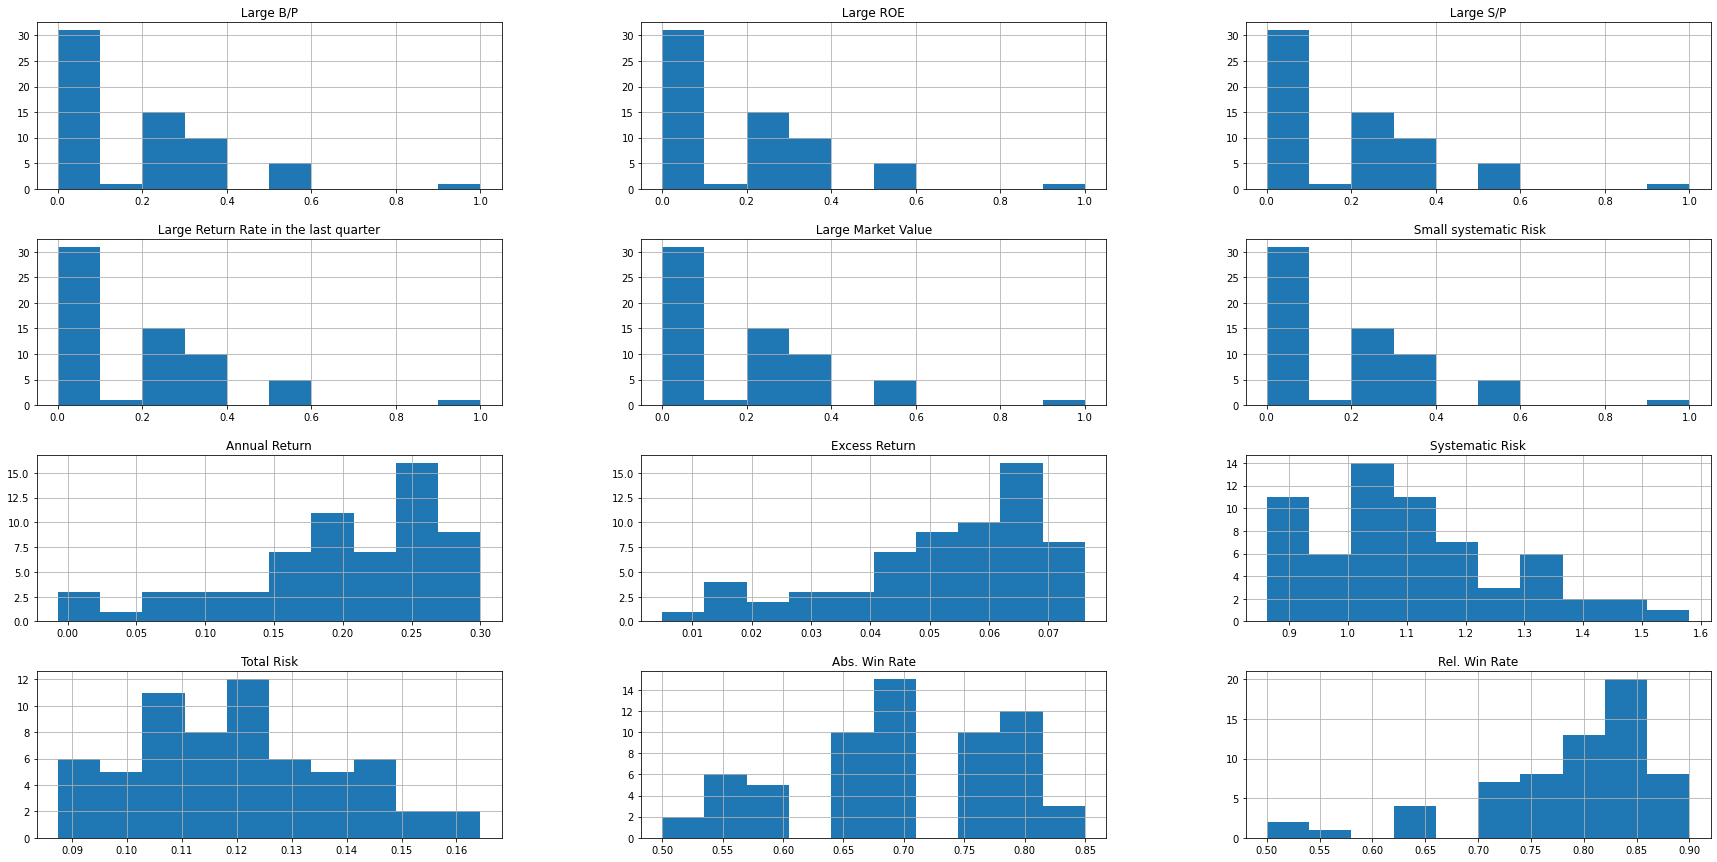

In [68]:
df_3.hist(figsize=(30,15))
plt.plot()

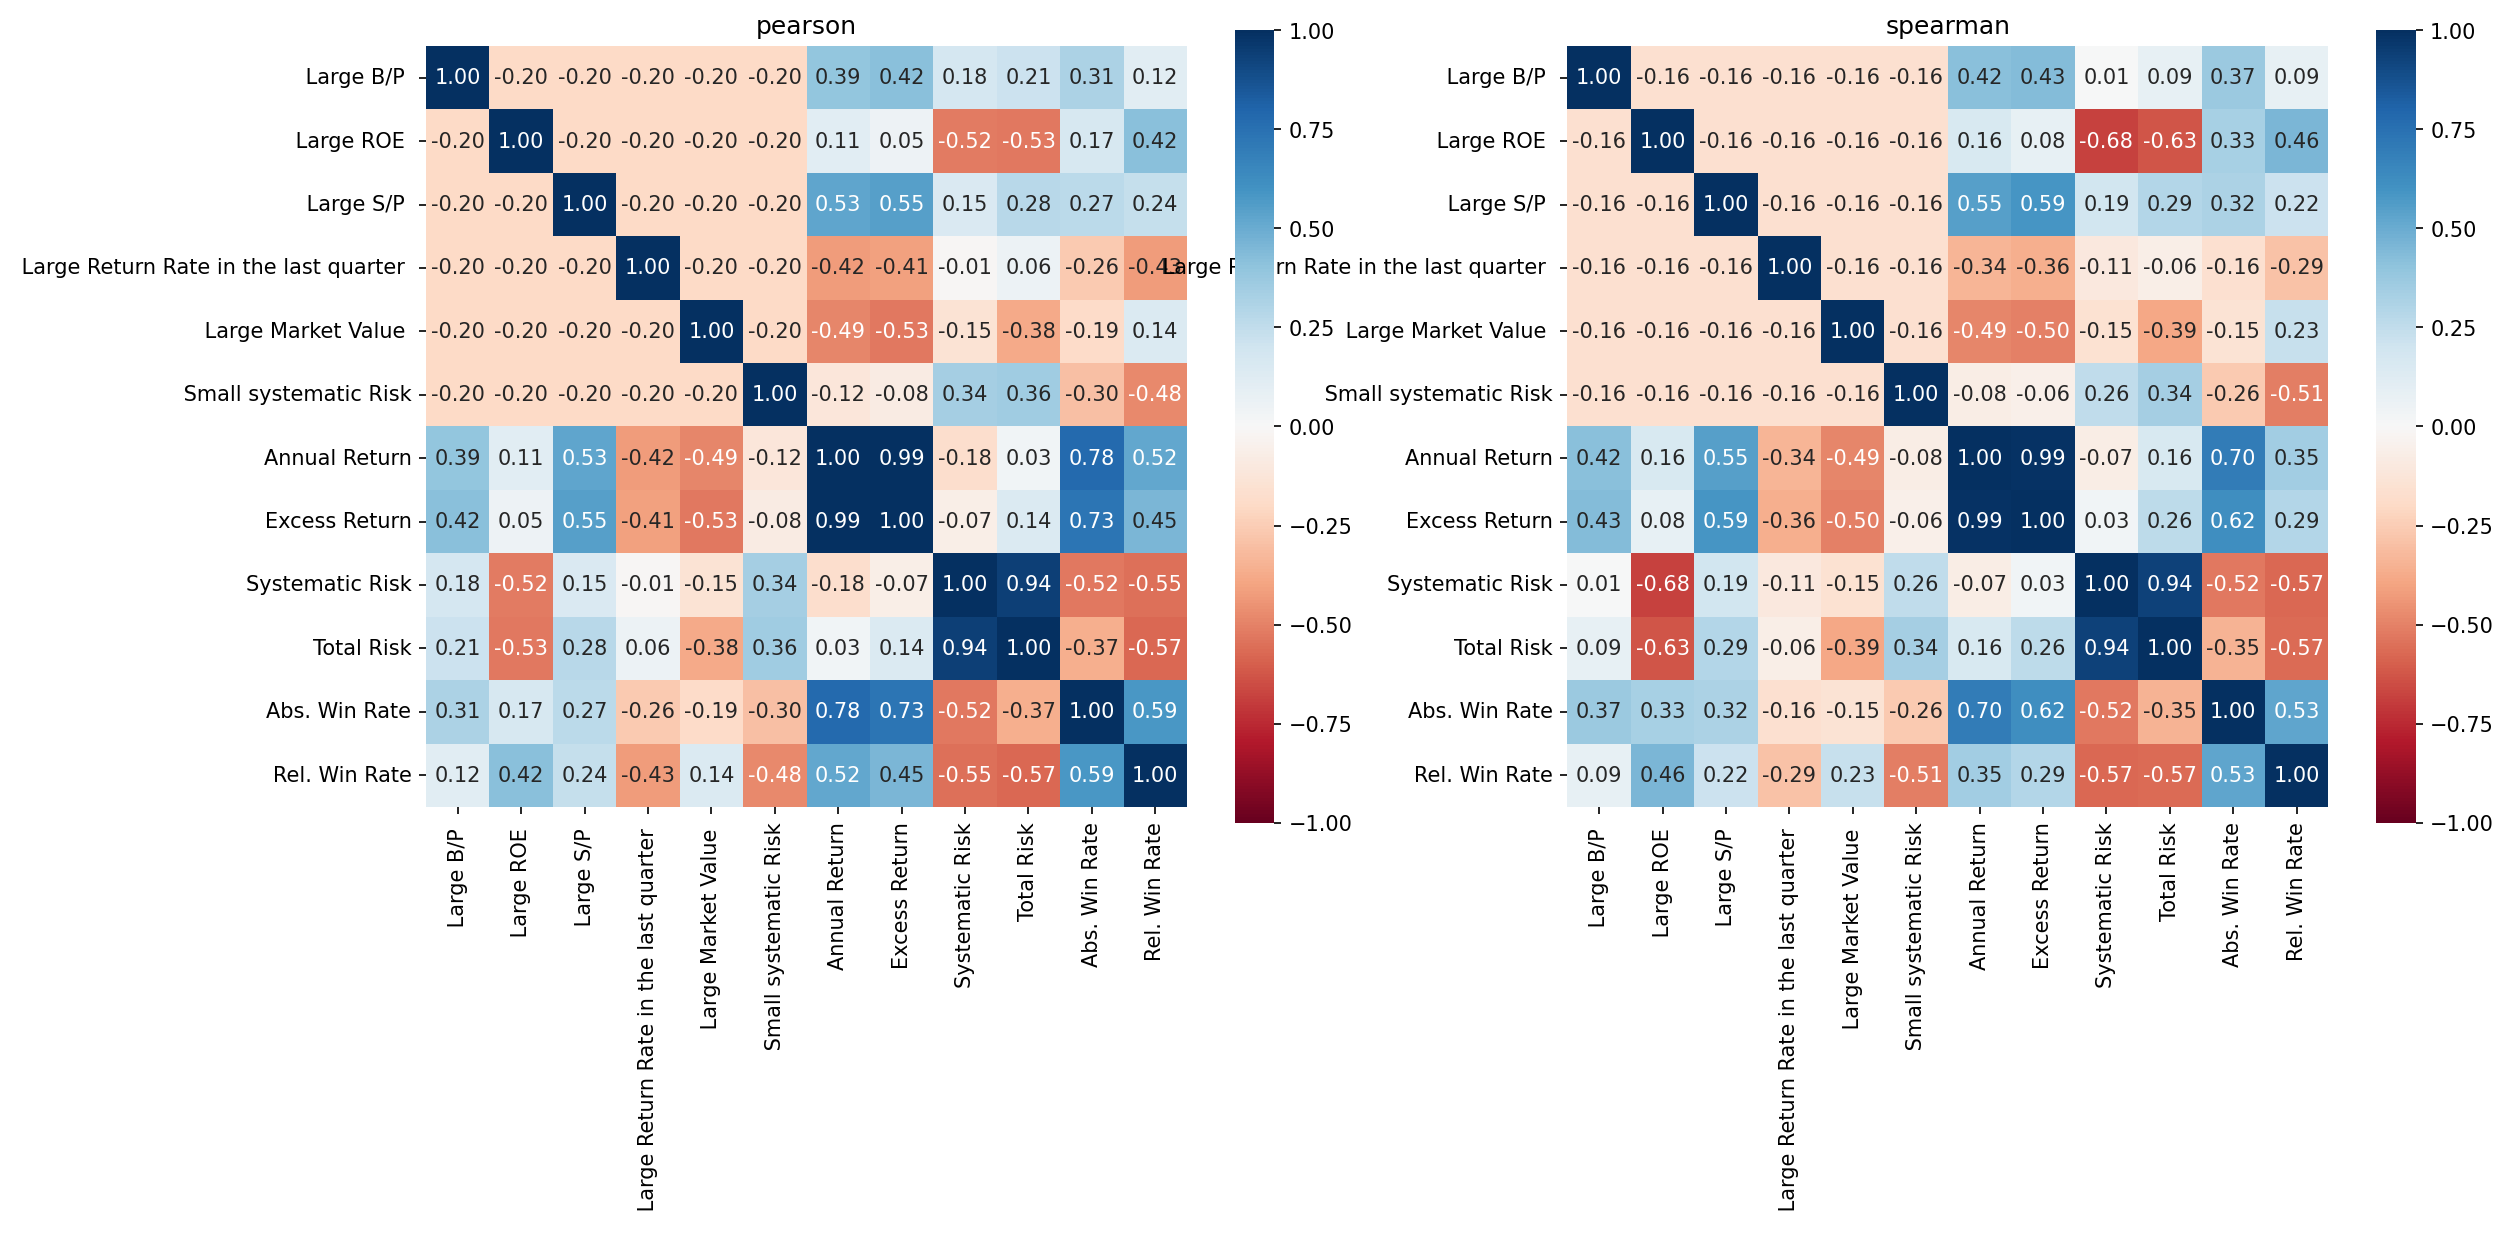

In [69]:
correlation(df_3, figsize=(18,7), dpi=150)

### 4th period analysis

In [70]:
df_4=df_dict['4th period'].iloc[:,:13].set_index('ID', drop=True)
df_4.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
ID,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.019516,0.013399,1.902608,0.218617,0.60,0.40
2,0.0,1.0,0.0,0.0,0.0,0.0,0.023829,0.006410,1.263287,0.128740,0.55,0.65
3,0.0,0.0,1.0,0.0,0.0,0.0,0.080282,0.026548,1.894339,0.208272,0.55,0.50
4,0.0,0.0,0.0,1.0,0.0,0.0,-0.006683,0.000728,1.425454,0.155526,0.55,0.35
5,0.0,0.0,0.0,0.0,1.0,0.0,0.021999,0.004407,1.094579,0.106729,0.65,0.70


[]

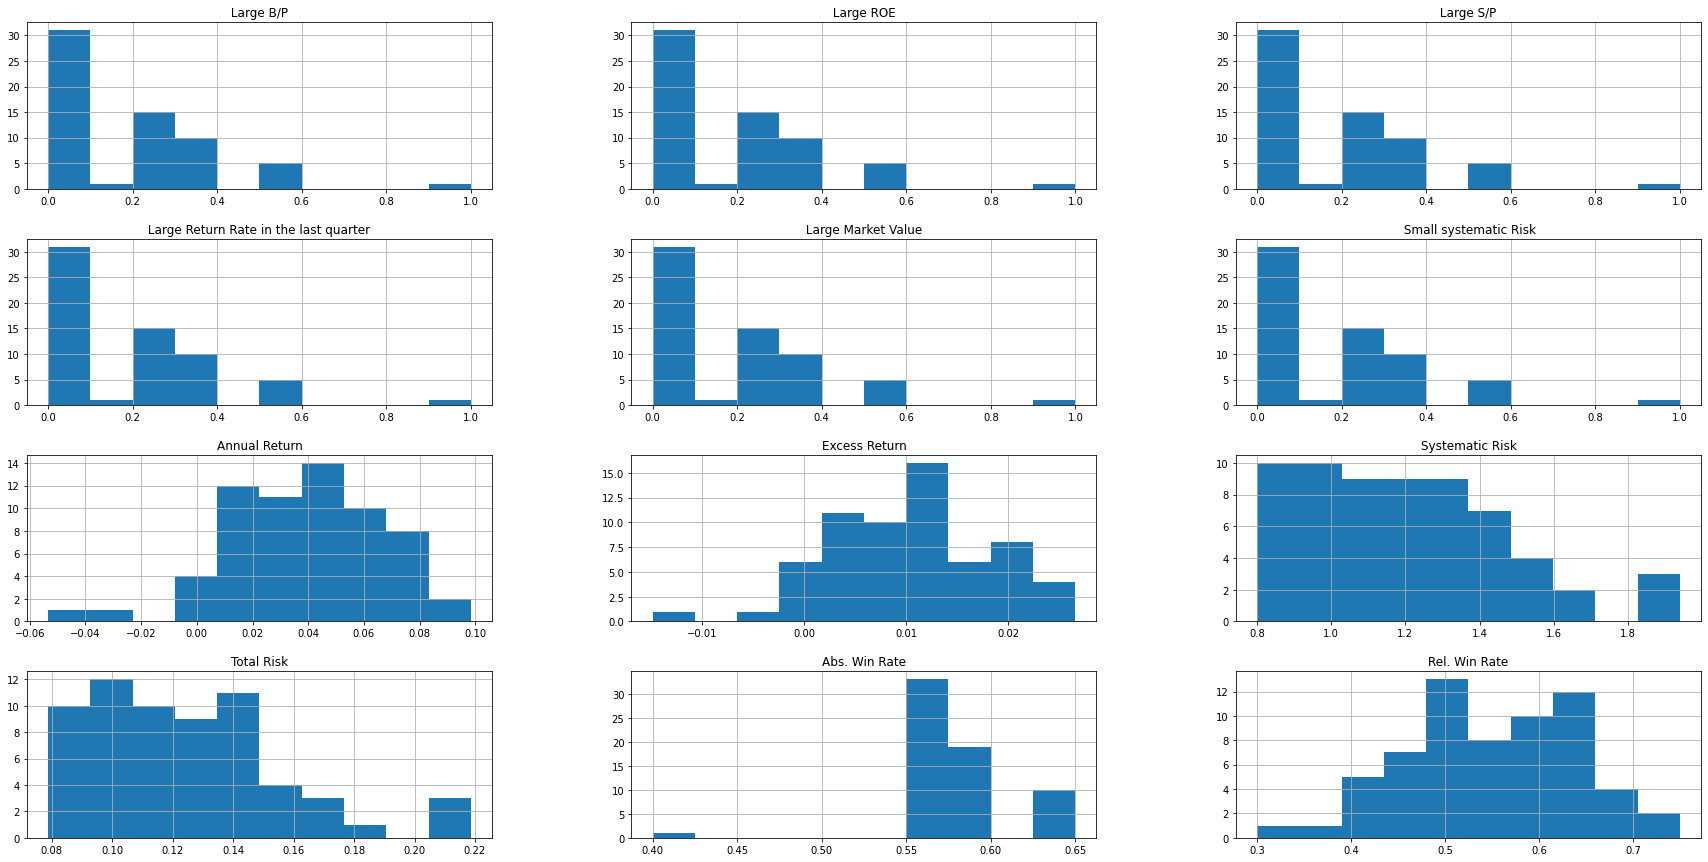

In [71]:
df_4.hist(figsize=(30,15))
plt.plot()

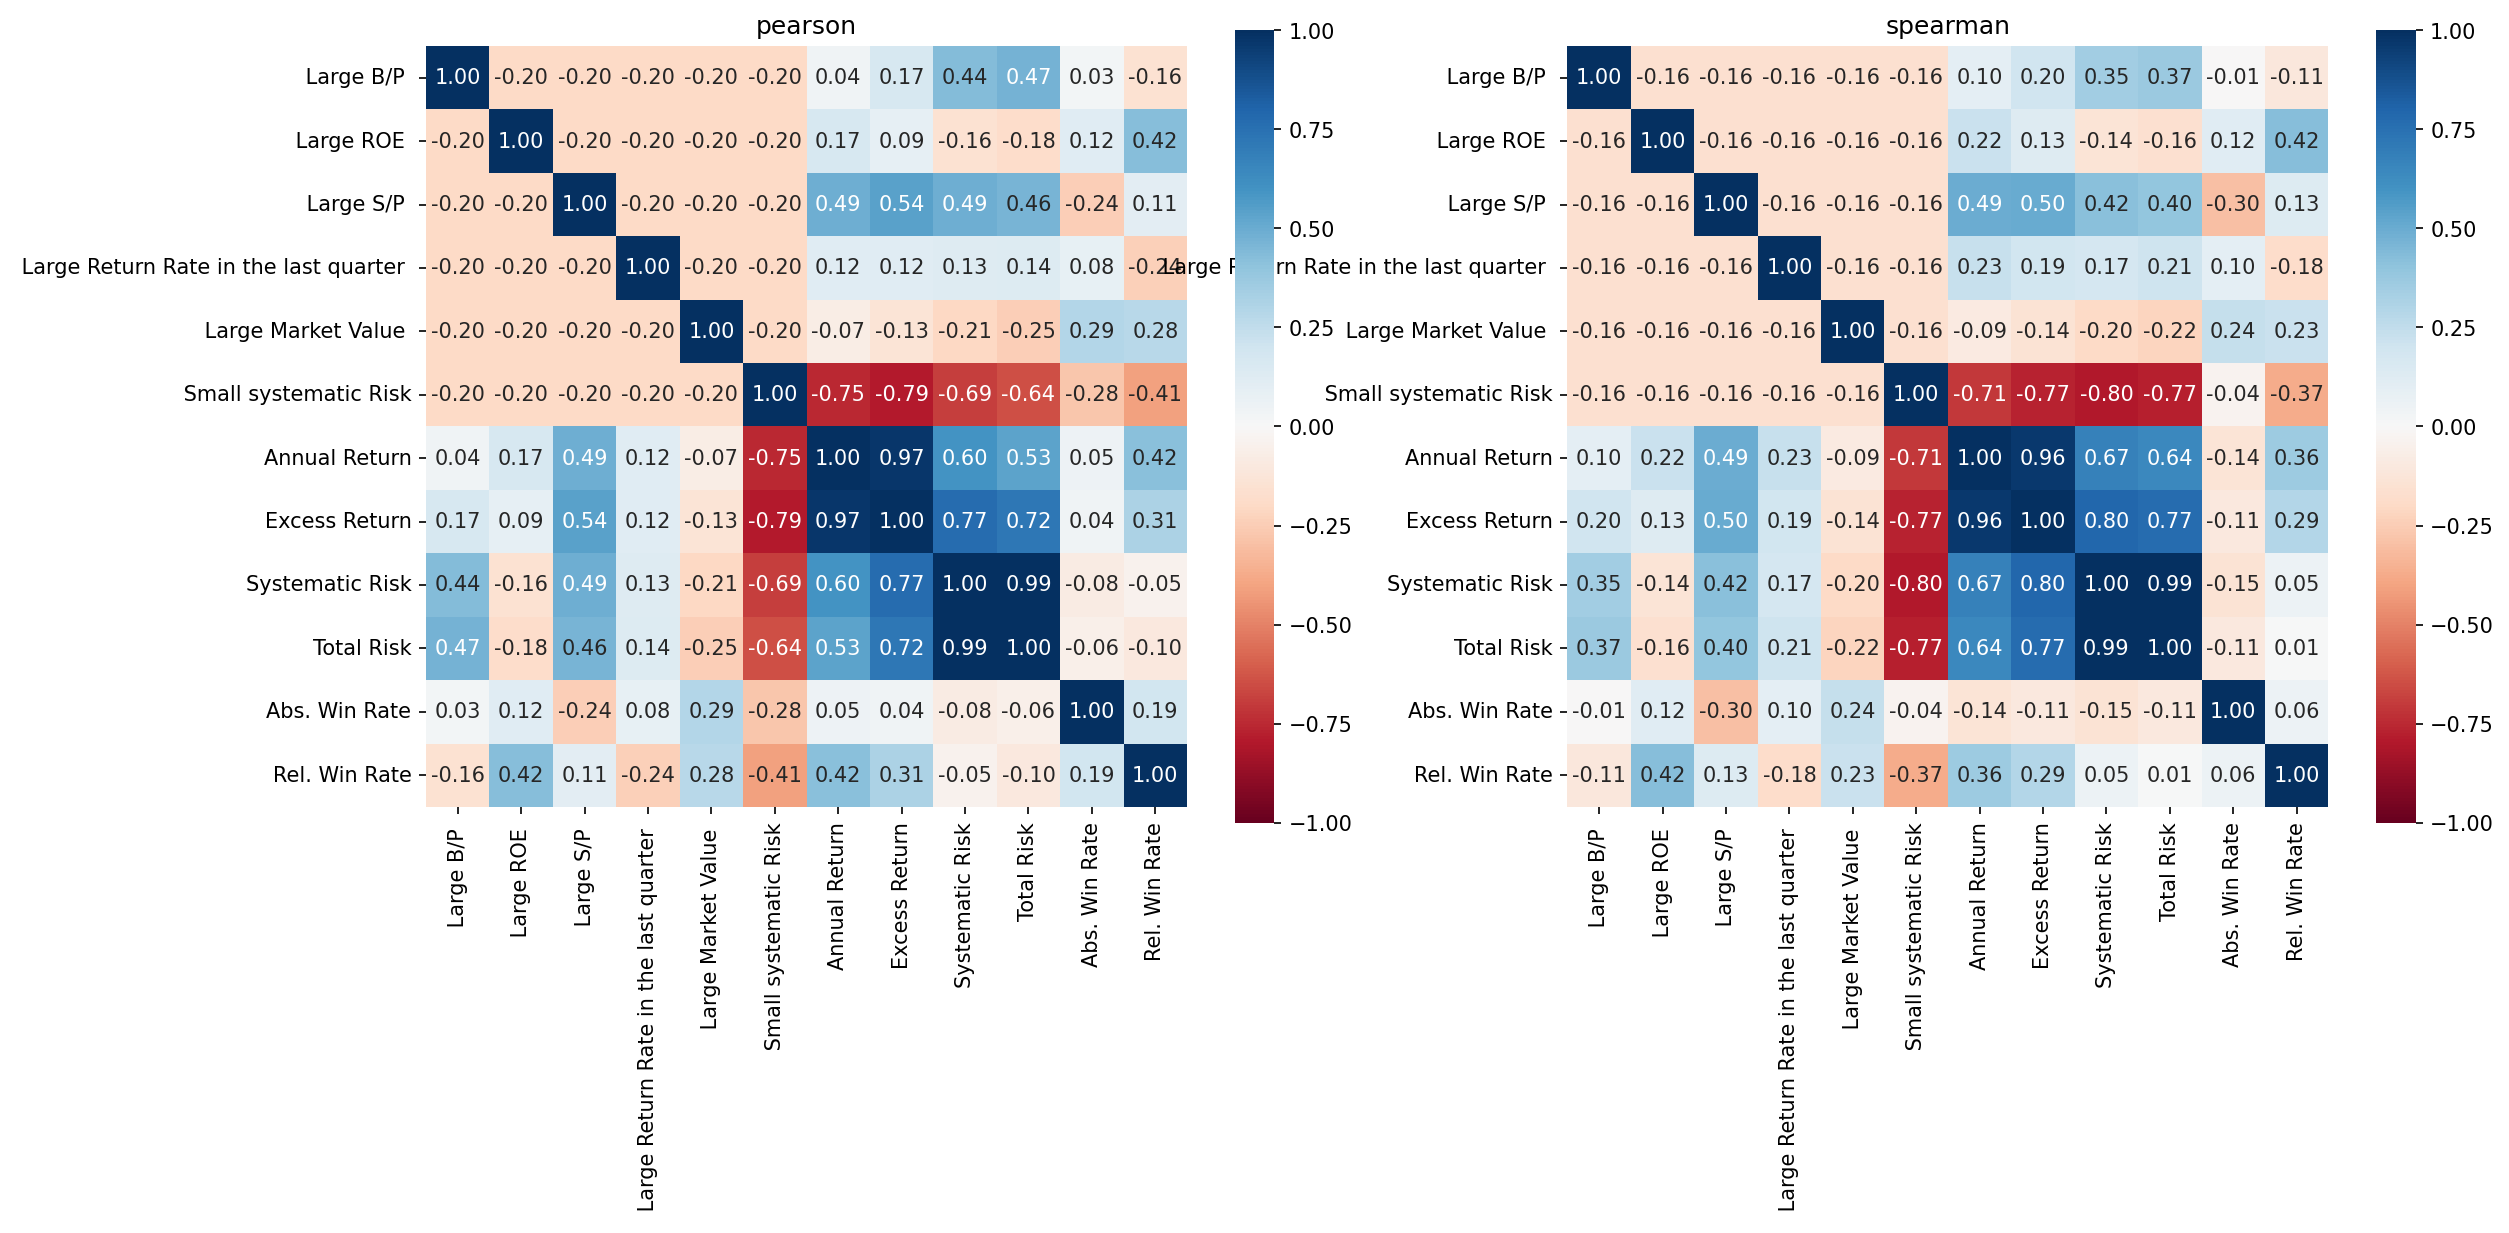

In [72]:
correlation(df_4, figsize=(18,7), dpi=150)

# outlier detection

				ANALYSIS OF:  Large B/P  

5 point summary for:  Large B/P 
      Large B/P 
min       0.0000
25%       0.0000
50%       0.1670
75%       0.2915
max       1.0000
---------------------------------
OUTLIERS in  Large B/P  via Z score

Outlier limits:
lower limit: -0.42652979628137544 
upper limit: 0.7597678915194706

Total outliers: 1
    outliers   Z-score
ID                    
1        1.0  4.215035
---------------------------------
OUTLIERS in  Large B/P  via IQR

Outlier limits:
lower limit: -0.43724999999999997 
upper limit: 0.72875

Total outliers: 1
ID
1    1.0
Name:  Large B/P , dtype: float64
---------------------------------


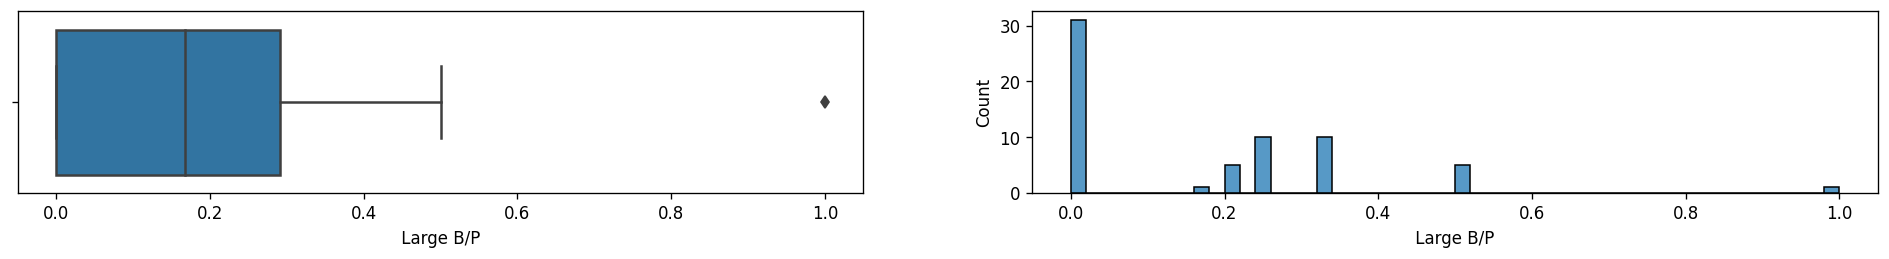

___________________________________________________________________________________________________________
				ANALYSIS OF:  Large ROE  

5 point summary for:  Large ROE 
      Large ROE 
min       0.0000
25%       0.0000
50%       0.1670
75%       0.2915
max       1.0000
---------------------------------
OUTLIERS in  Large ROE  via Z score

Outlier limits:
lower limit: -0.42652979628137544 
upper limit: 0.7597678915194706

Total outliers: 1
    outliers   Z-score
ID                    
2        1.0  4.215035
---------------------------------
OUTLIERS in  Large ROE  via IQR

Outlier limits:
lower limit: -0.43724999999999997 
upper limit: 0.72875

Total outliers: 1
ID
2    1.0
Name:  Large ROE , dtype: float64
---------------------------------


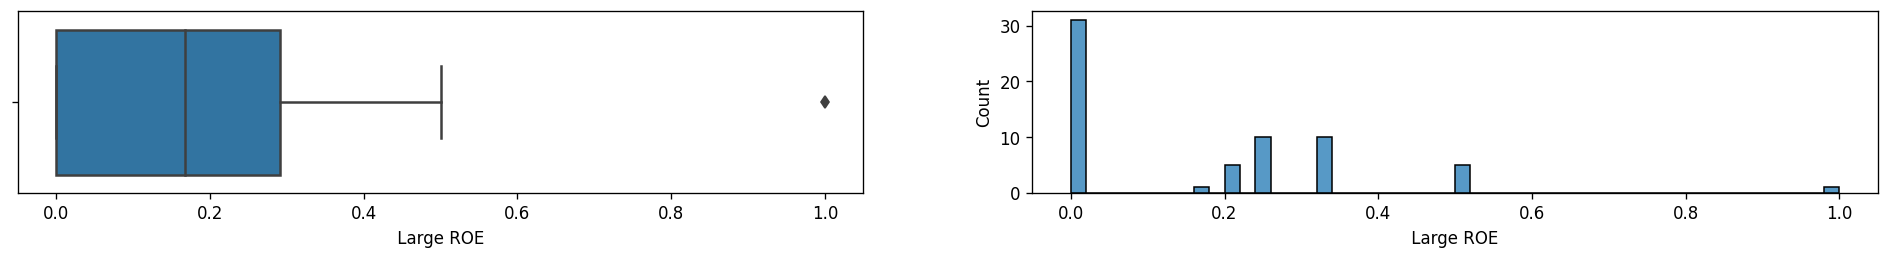

___________________________________________________________________________________________________________
				ANALYSIS OF:  Large S/P  

5 point summary for:  Large S/P 
      Large S/P 
min       0.0000
25%       0.0000
50%       0.1670
75%       0.2915
max       1.0000
---------------------------------
OUTLIERS in  Large S/P  via Z score

Outlier limits:
lower limit: -0.42652979628137544 
upper limit: 0.7597678915194706

Total outliers: 1
    outliers   Z-score
ID                    
3        1.0  4.215035
---------------------------------
OUTLIERS in  Large S/P  via IQR

Outlier limits:
lower limit: -0.43724999999999997 
upper limit: 0.72875

Total outliers: 1
ID
3    1.0
Name:  Large S/P , dtype: float64
---------------------------------


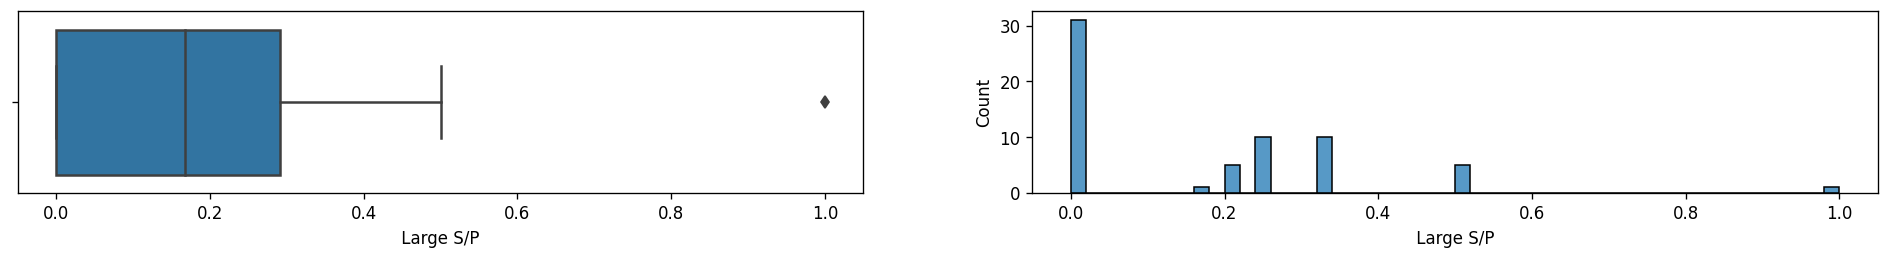

___________________________________________________________________________________________________________
				ANALYSIS OF:  Large Return Rate in the last quarter  

5 point summary for:  Large Return Rate in the last quarter 
      Large Return Rate in the last quarter 
min                                   0.0000
25%                                   0.0000
50%                                   0.1670
75%                                   0.2915
max                                   1.0000
---------------------------------
OUTLIERS in  Large Return Rate in the last quarter  via Z score

Outlier limits:
lower limit: -0.42652979628137544 
upper limit: 0.7597678915194706

Total outliers: 1
    outliers   Z-score
ID                    
4        1.0  4.215035
---------------------------------
OUTLIERS in  Large Return Rate in the last quarter  via IQR

Outlier limits:
lower limit: -0.43724999999999997 
upper limit: 0.72875

Total outliers: 1
ID
4    1.0
Name:  Large Return Rate in the la

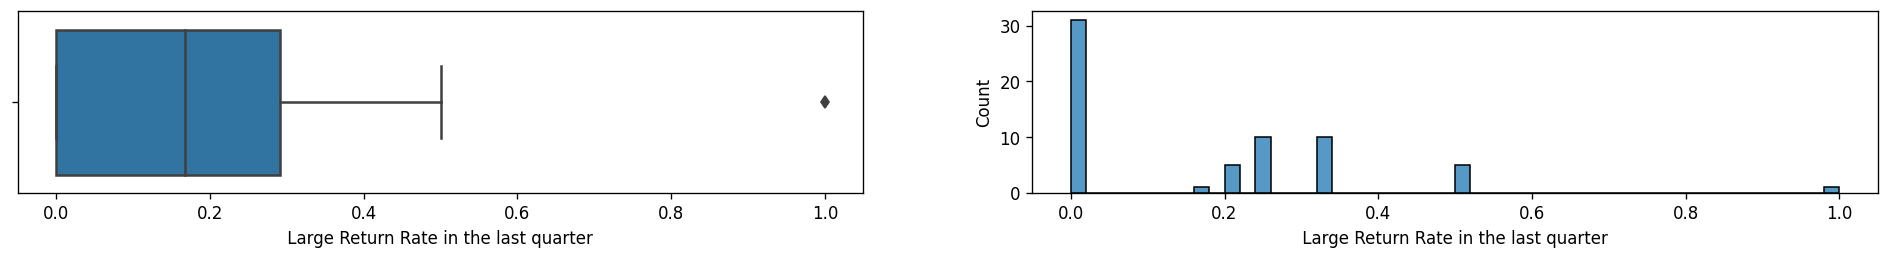

___________________________________________________________________________________________________________
				ANALYSIS OF:  Large Market Value  

5 point summary for:  Large Market Value 
      Large Market Value 
min                0.0000
25%                0.0000
50%                0.1670
75%                0.2915
max                1.0000
---------------------------------
OUTLIERS in  Large Market Value  via Z score

Outlier limits:
lower limit: -0.42652979628137544 
upper limit: 0.7597678915194706

Total outliers: 1
    outliers   Z-score
ID                    
5        1.0  4.215035
---------------------------------
OUTLIERS in  Large Market Value  via IQR

Outlier limits:
lower limit: -0.43724999999999997 
upper limit: 0.72875

Total outliers: 1
ID
5    1.0
Name:  Large Market Value , dtype: float64
---------------------------------


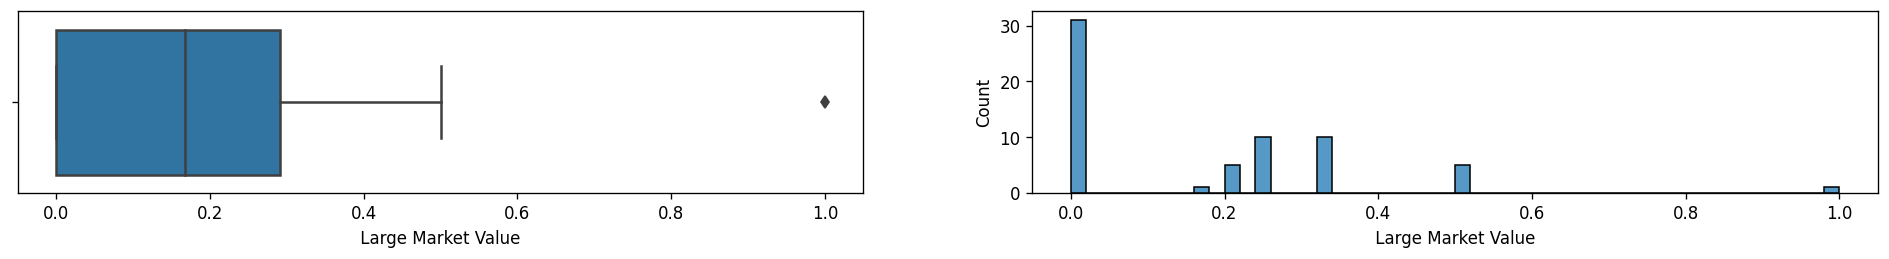

___________________________________________________________________________________________________________
				ANALYSIS OF:  Small systematic Risk 

5 point summary for:  Small systematic Risk
      Small systematic Risk
min                  0.0000
25%                  0.0000
50%                  0.1670
75%                  0.2915
max                  1.0000
---------------------------------
OUTLIERS in  Small systematic Risk via Z score

Outlier limits:
lower limit: -0.42652979628137544 
upper limit: 0.7597678915194706

Total outliers: 1
    outliers   Z-score
ID                    
6        1.0  4.215035
---------------------------------
OUTLIERS in  Small systematic Risk via IQR

Outlier limits:
lower limit: -0.43724999999999997 
upper limit: 0.72875

Total outliers: 1
ID
6    1.0
Name:  Small systematic Risk, dtype: float64
---------------------------------


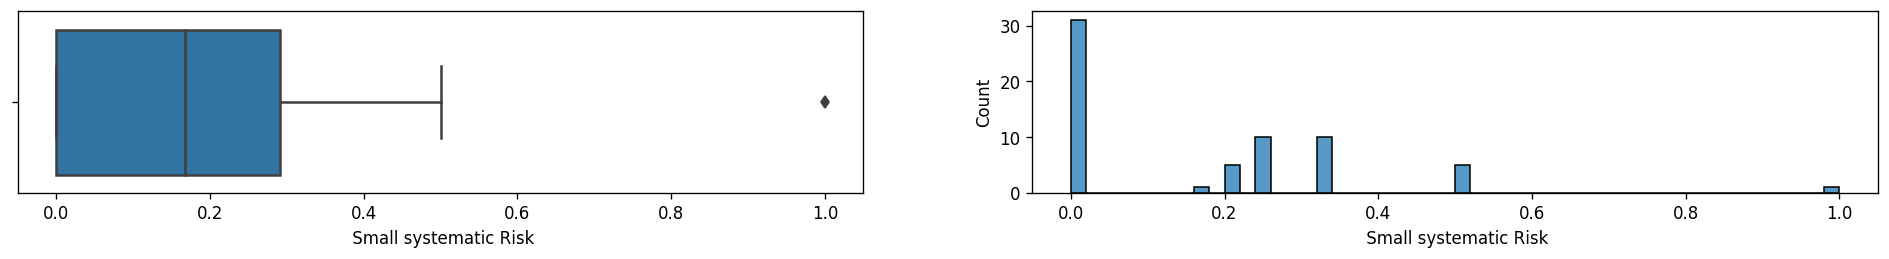

___________________________________________________________________________________________________________
				ANALYSIS OF: Annual Return 

5 point summary for: Annual Return
     Annual Return
min          0.070
25%          0.138
50%          0.153
75%          0.170
max          0.195
---------------------------------
OUTLIERS in Annual Return via Z score

Outlier limits:
lower limit: 0.06628765515364433 
upper limit: 0.23218853532254619

Total outliers: 0
---------------------------------
OUTLIERS in Annual Return via IQR

Outlier limits:
lower limit: 0.09000000000000001 
upper limit: 0.21800000000000003

Total outliers: 3
ID
6     0.07
16    0.09
41    0.09
Name: Annual Return, dtype: float64
---------------------------------


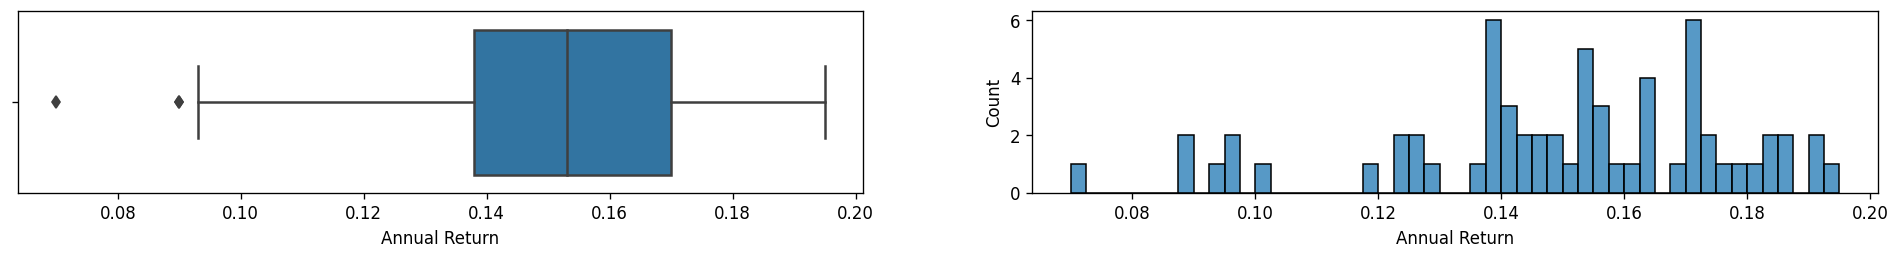

___________________________________________________________________________________________________________
				ANALYSIS OF: Excess Return 

5 point summary for: Excess Return
     Excess Return
min        -0.0050
25%         0.0120
50%         0.0150
75%         0.0195
max         0.0260
---------------------------------
OUTLIERS in Excess Return via Z score

Outlier limits:
lower limit: -0.006385990359688372 
upper limit: 0.03587805385175187

Total outliers: 0
---------------------------------
OUTLIERS in Excess Return via IQR

Outlier limits:
lower limit: 0.0007500000000000007 
upper limit: 0.03075

Total outliers: 4
ID
6    -0.005
4    -0.002
16   -0.001
41    0.000
Name: Excess Return, dtype: float64
---------------------------------


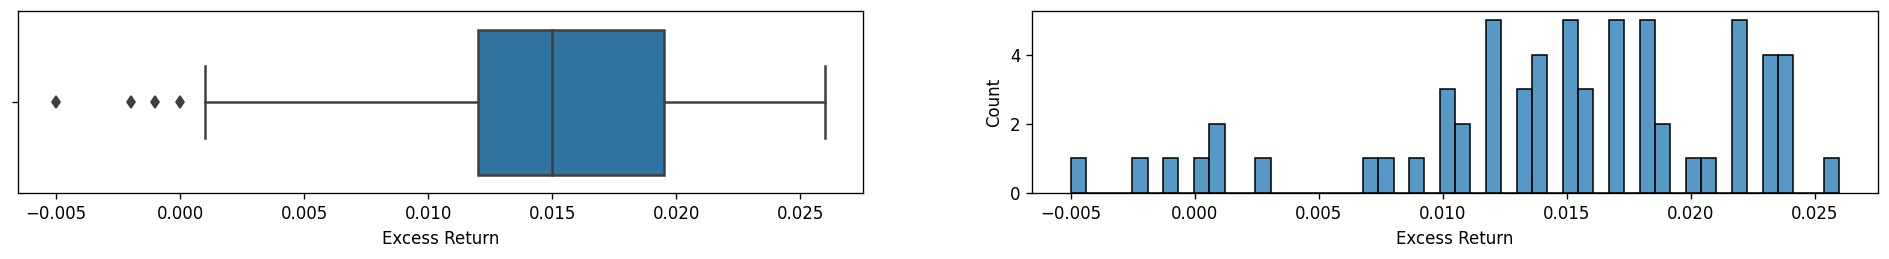

___________________________________________________________________________________________________________
				ANALYSIS OF: Systematic Risk 

5 point summary for: Systematic Risk
     Systematic Risk
min             0.82
25%             0.97
50%             1.01
75%             1.08
max             1.39
---------------------------------
OUTLIERS in Systematic Risk via Z score

Outlier limits:
lower limit: 0.7020366607255565 
upper limit: 1.369709371020475

Total outliers: 1
    outliers  Z-score
ID                   
4       1.39  3.18234
---------------------------------
OUTLIERS in Systematic Risk via IQR

Outlier limits:
lower limit: 0.8049999999999998 
upper limit: 1.245

Total outliers: 4
ID
3    1.30
8    1.32
1    1.33
4    1.39
Name: Systematic Risk, dtype: float64
---------------------------------


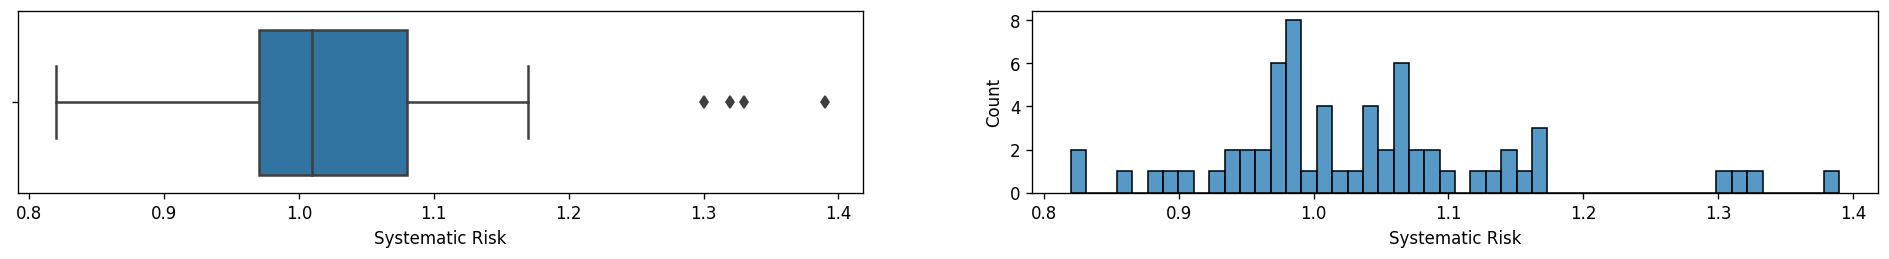

___________________________________________________________________________________________________________
				ANALYSIS OF: Total Risk 

5 point summary for: Total Risk
     Total Risk
min      0.0860
25%      0.0965
50%      0.1040
75%      0.1130
max      0.1490
---------------------------------
OUTLIERS in Total Risk via Z score

Outlier limits:
lower limit: 0.06382771232094642 
upper limit: 0.1488072083139742

Total outliers: 2
    outliers   Z-score
ID                    
1      0.149  3.013612
8      0.149  3.013612
---------------------------------
OUTLIERS in Total Risk via IQR

Outlier limits:
lower limit: 0.07175000000000001 
upper limit: 0.13775

Total outliers: 4
ID
3    0.144
4    0.144
1    0.149
8    0.149
Name: Total Risk, dtype: float64
---------------------------------


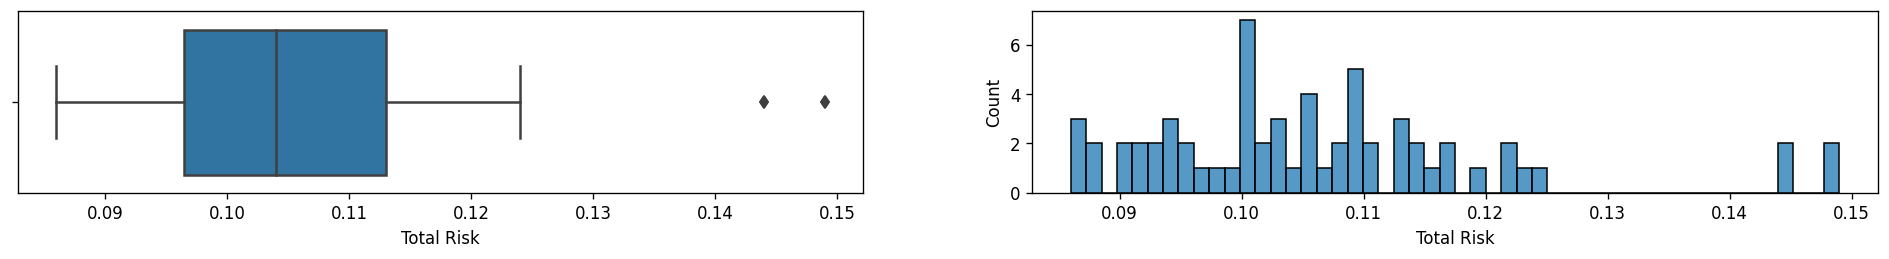

___________________________________________________________________________________________________________
				ANALYSIS OF: Abs. Win Rate 

5 point summary for: Abs. Win Rate
     Abs. Win Rate
min          0.563
25%          0.663
50%          0.675
75%          0.700
max          0.750
---------------------------------
OUTLIERS in Abs. Win Rate via Z score

Outlier limits:
lower limit: 0.5726515020337277 
upper limit: 0.7821421487599232

Total outliers: 1
    outliers   Z-score
ID                    
6      0.563 -3.276428
---------------------------------
OUTLIERS in Abs. Win Rate via IQR

Outlier limits:
lower limit: 0.6075000000000002 
upper limit: 0.7554999999999998

Total outliers: 2
ID
6     0.563
41    0.588
Name: Abs. Win Rate, dtype: float64
---------------------------------


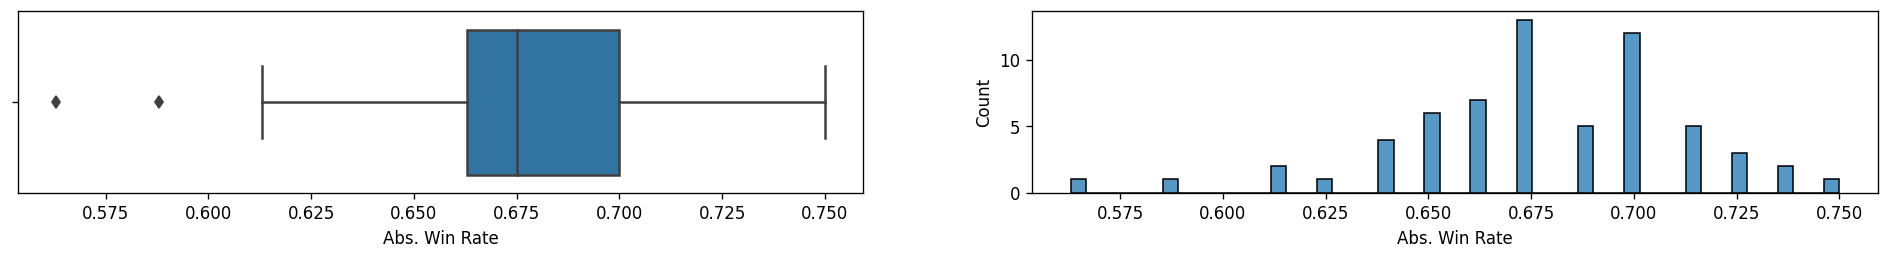

___________________________________________________________________________________________________________
				ANALYSIS OF: Rel. Win Rate 

5 point summary for: Rel. Win Rate
     Rel. Win Rate
min          0.450
25%          0.525
50%          0.575
75%          0.625
max          0.663
---------------------------------
OUTLIERS in Rel. Win Rate via Z score

Outlier limits:
lower limit: 0.4053236167867919 
upper limit: 0.7415970181338427

Total outliers: 0
---------------------------------
OUTLIERS in Rel. Win Rate via IQR

Outlier limits:
lower limit: 0.37500000000000006 
upper limit: 0.7749999999999999

Total outliers: 0
---------------------------------


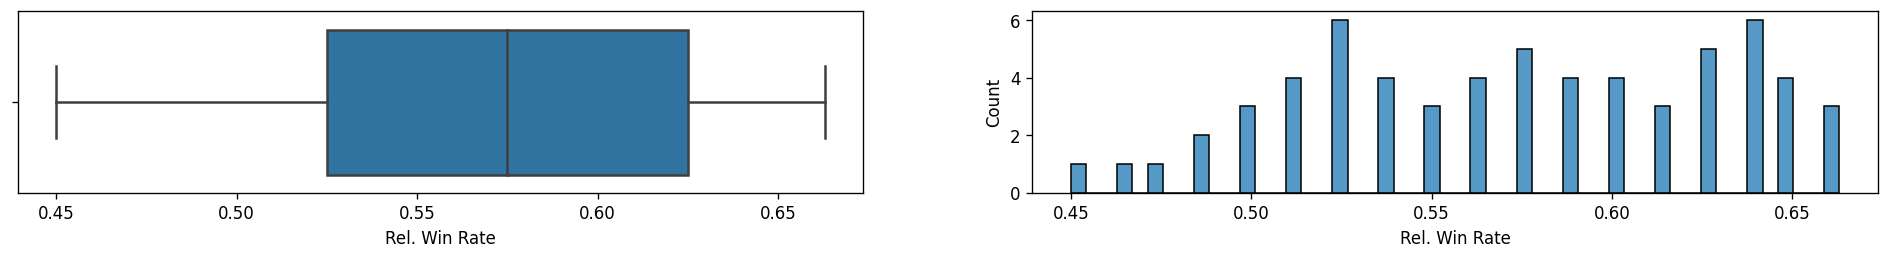

___________________________________________________________________________________________________________


In [73]:
analysis_quant(df_all)

# BIVARIATE ANALYSIS

### analysing continuous features  

In [74]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')

df_=df_all.drop('Annual Return', axis=1)
num_binned=pd.DataFrame(discrete.fit_transform(df_), index=df_.index, columns=df_.columns)
num_binned.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
ID,,,,,,,,,,,
1,3.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,9.0,3.0,2.0
2,0.0,3.0,0.0,0.0,0.0,0.0,1.0,9.0,6.0,3.0,9.0
3,0.0,0.0,3.0,0.0,0.0,0.0,7.0,9.0,9.0,1.0,1.0
4,0.0,0.0,0.0,3.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0
5,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,7.0,3.0


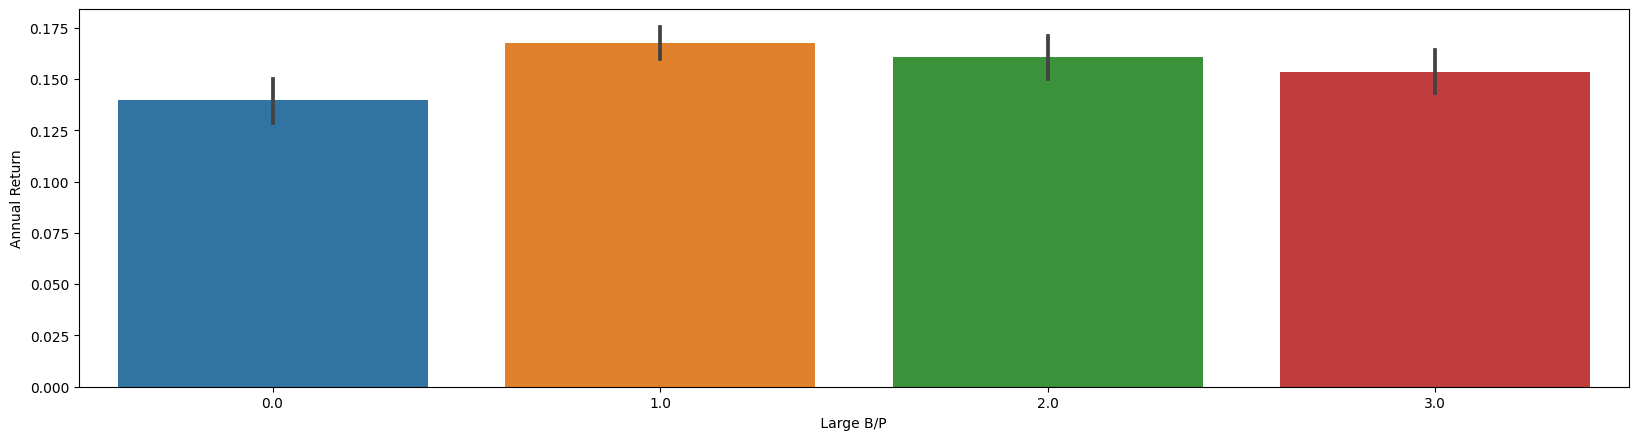

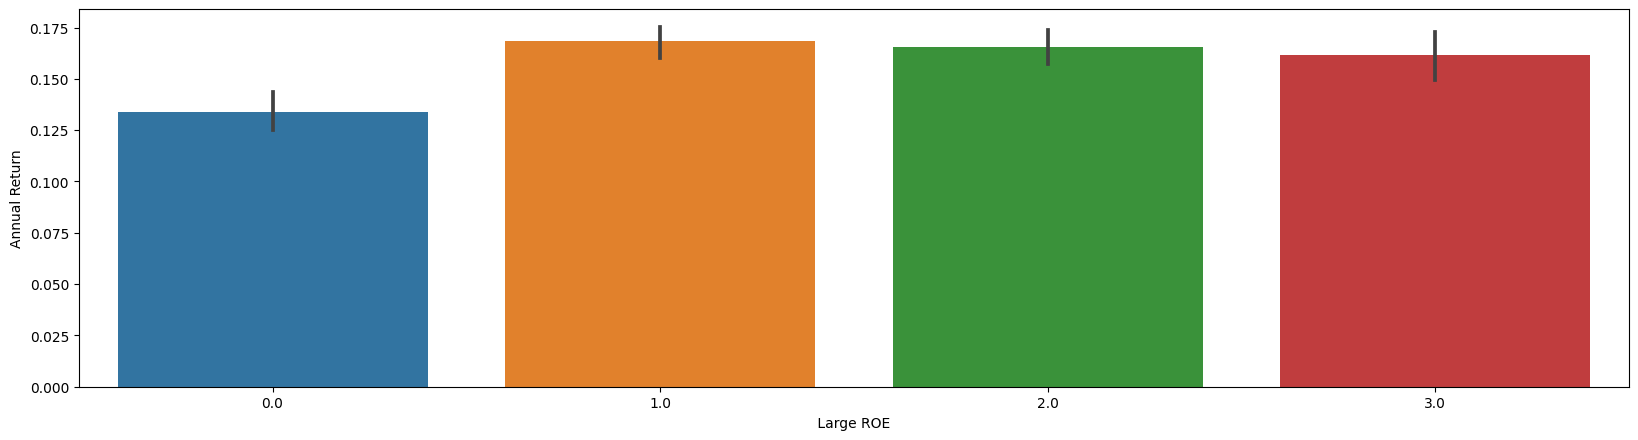

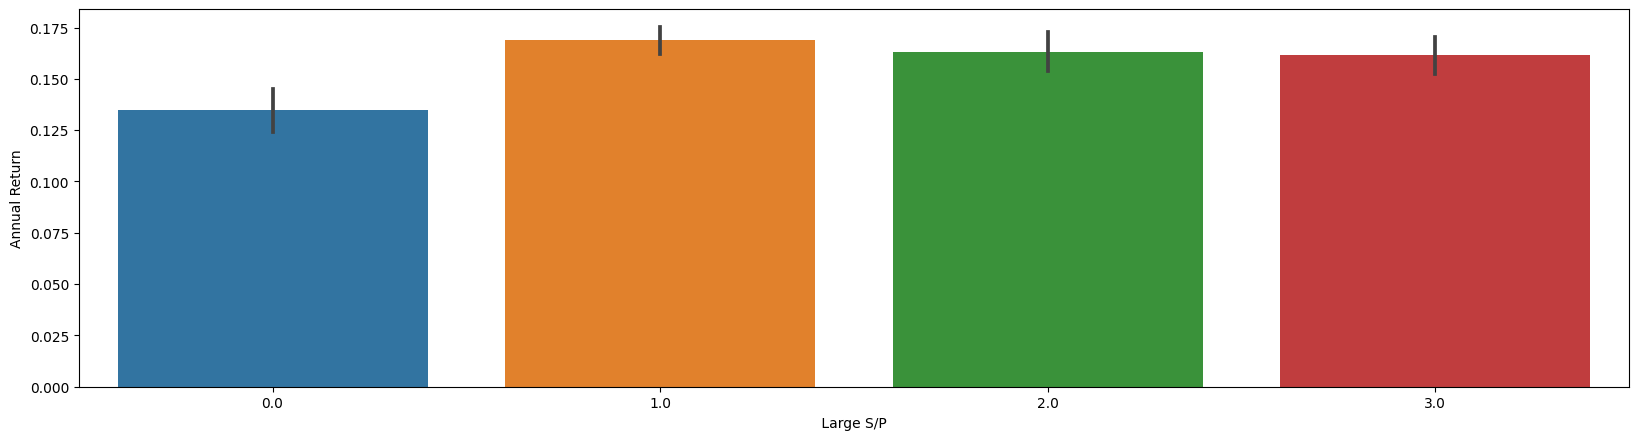

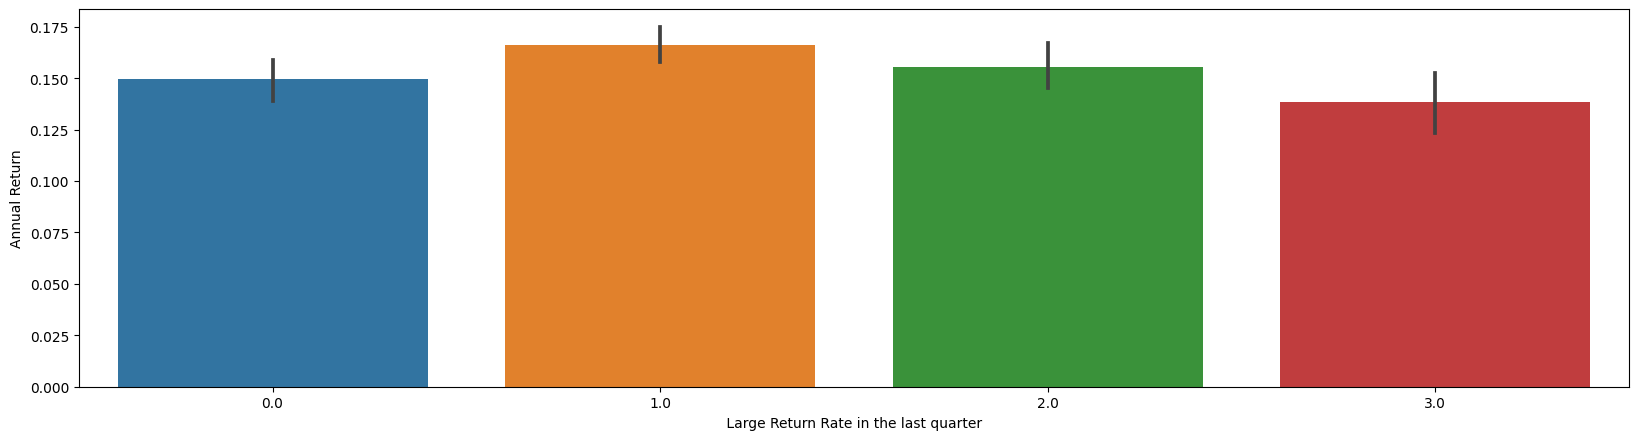

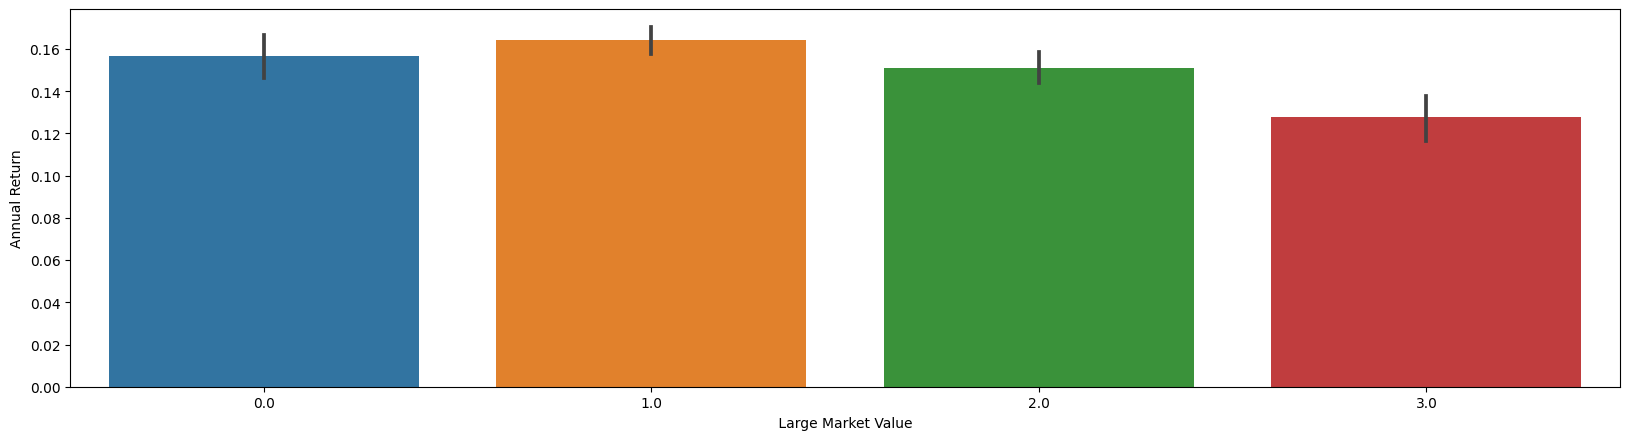

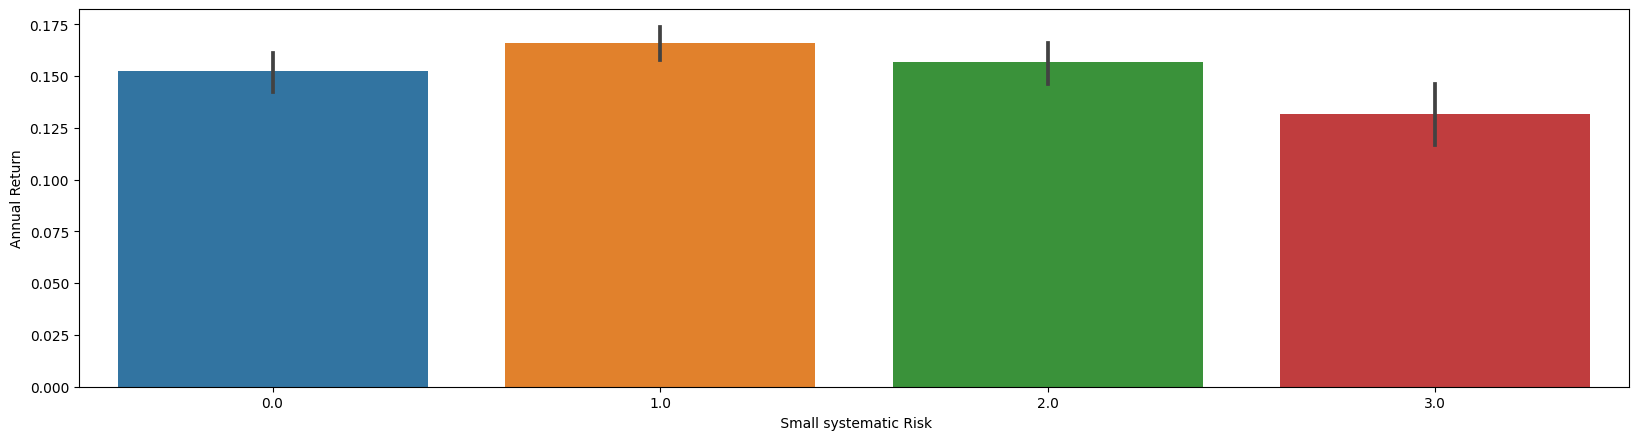

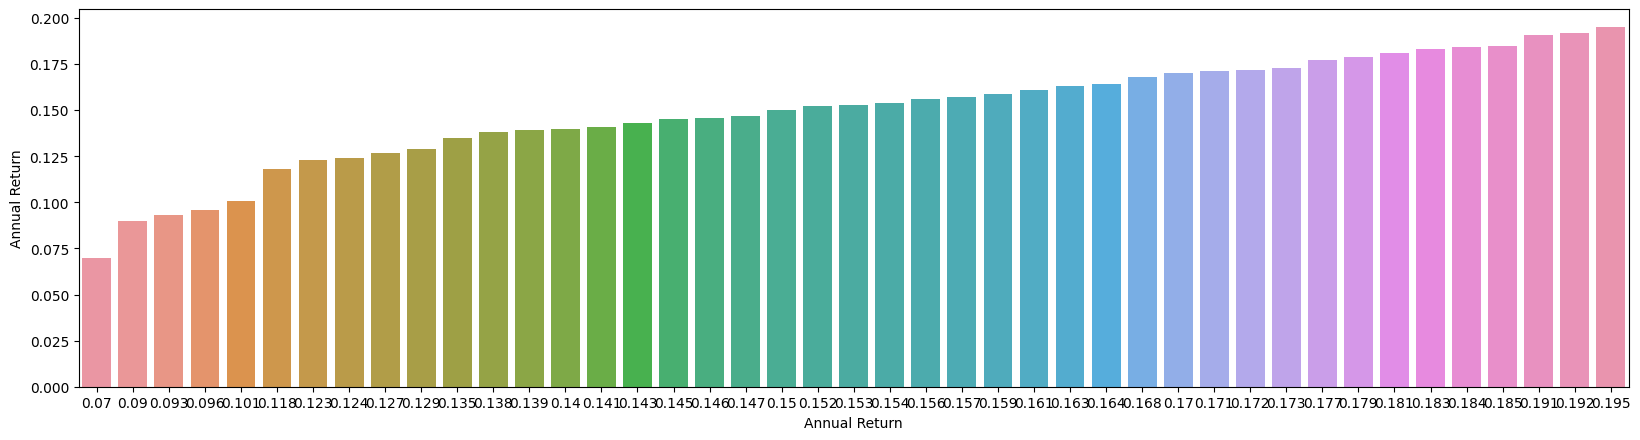

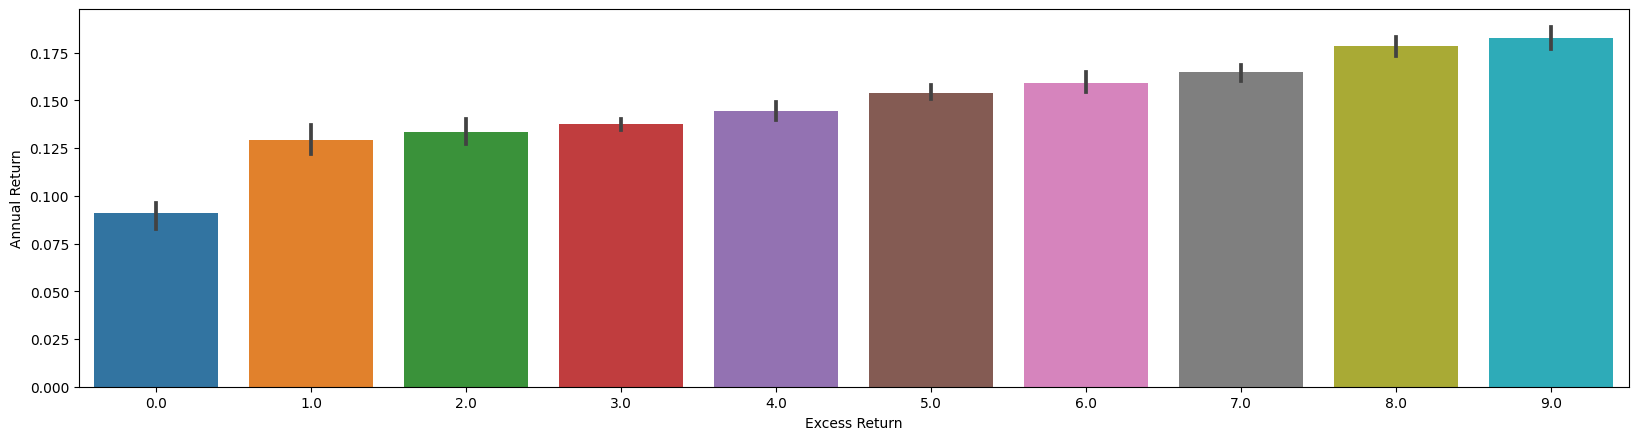

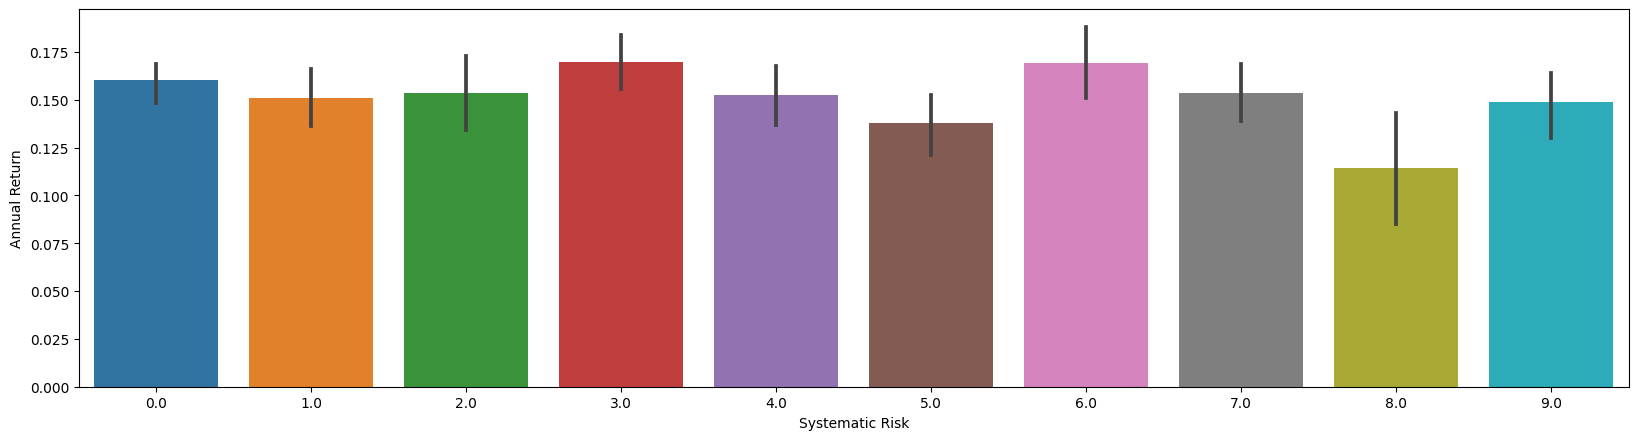

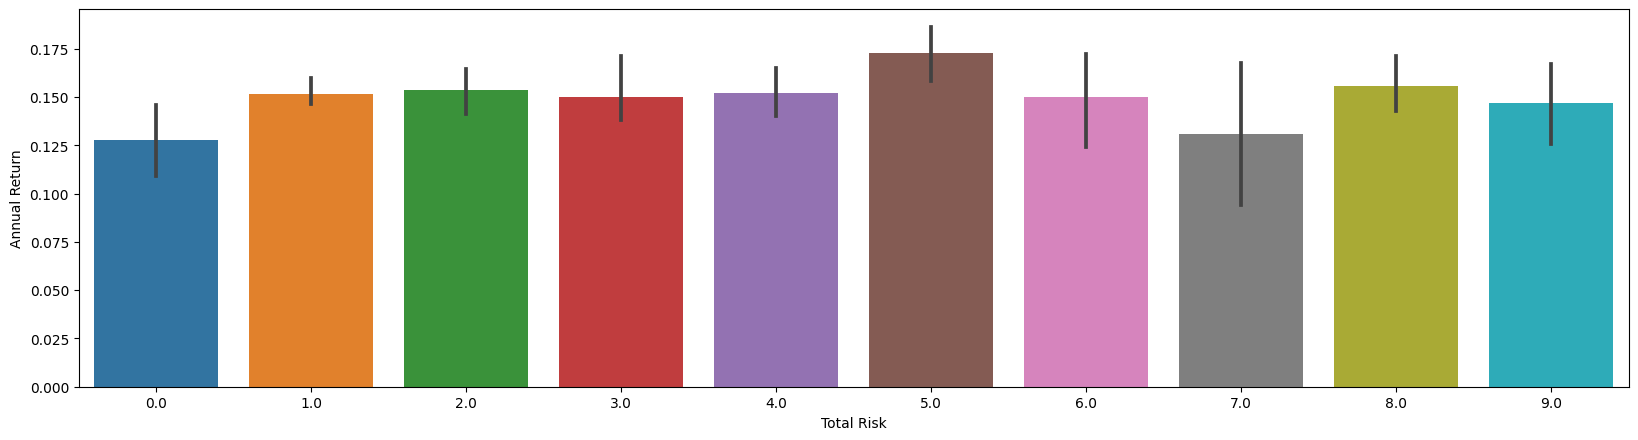

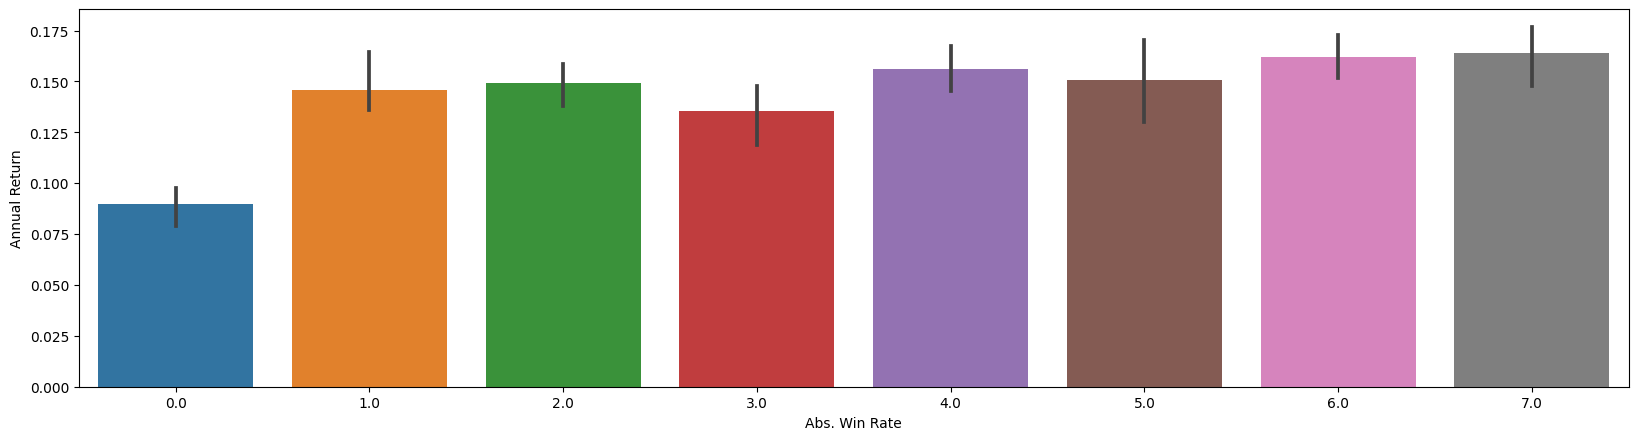

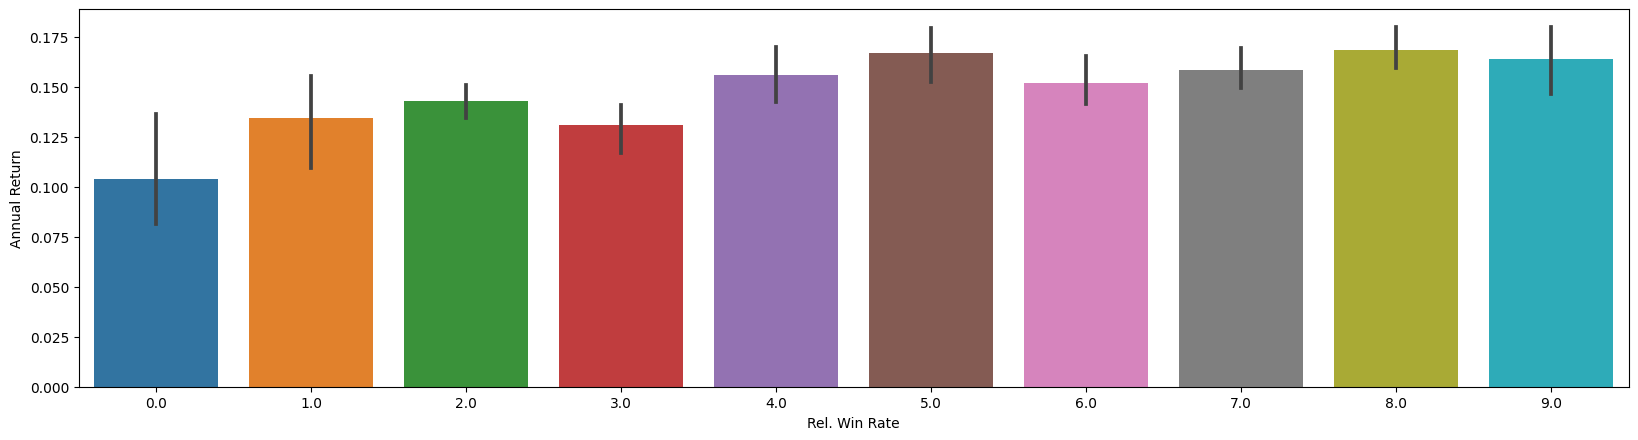

In [75]:
X_bin_combined=pd.concat([df_all['Annual Return'],num_binned],axis=1,join='inner')

for col in df_all.columns:
    plt.figure(figsize=(20,5), dpi=100)
    sns.barplot(x=col, y='Annual Return',data=X_bin_combined, estimator=np.mean )
    plt.show()

# dropping certain columns

# MODEL

### train test split

In [26]:
X=df_all.iloc[:,:6]
y=df_all['Annual Return']
xtrain,xtest,ytrain,ytest=train_test_split(X,y)

### defining models

In [27]:
model_lr=LinearRegression(n_jobs=-1)

model_dt=DecisionTreeRegressor() #max_depth=30, min_samples_split=50 )   

model_rf=RandomForestRegressor(n_jobs=-1) #, max_features=0.5, max_depth=6, min_samples_split=50)    

model_ada_dt=AdaBoostRegressor( )#base_estimator=DecisionTreeRegressor(max_depth=6, min_samples_split=50), n_estimators=100, learning_rate=5)   

model_ada_rf=AdaBoostRegressor(base_estimator=RandomForestRegressor(n_jobs=-1)) #, max_features=0.5, max_depth=6, min_samples_split=50), n_estimators=50, learning_rate=0.1)  

model_gb=GradientBoostingRegressor() #max_depth=6, min_samples_split=50)

model_xgb=XGBRegressor(n_jobs=-1) #n_estimators=500, learning_rate=0.1 ) 

model_svr=SVR() #C=0.1, degree=5 )   

model_knc=KNeighborsRegressor(n_neighbors=5, n_jobs=-1, weights='distance')   

model_rnc=RadiusNeighborsRegressor(radius=10, n_jobs=-1, weights='distance')   

# dictionary of all models
models={'linear':model_lr, 'decision tree':model_dt, 'random forest':model_rf, 'adaboost using dt':model_ada_dt, 'adaboost using rf':model_ada_rf,
        'gradboost':model_gb, 'xgboost':model_xgb, 'SVR':model_svr, 'KNC':model_knc, 'RNC':model_rnc }

### pipeline and scores

In [28]:
# making 
pipelines=[]
r2={}

for name,model in models.items():
    
    # making pipeline for each model
    pipeline = Pipeline(steps=[( "scaler", StandardScaler() ),
                               ( "regressor", model )
                              ]
                       )
    
    # print name of pipeline
    print(name.upper())
    
    # fitting data
    pipeline.fit(xtrain,ytrain)
    
    # calculating scores and storing
    score_cv=np.mean(cross_val_score(pipeline, X, y, cv=5, scoring='r2'))    
    r2[name]=score_cv
    
    # printing scores
    print('train score: ', pipeline.score(xtrain,ytrain) )
    print('test score: ', pipeline.score(xtest,ytest) )
    print('cross validation r2 score:', score_cv)
    print()
    

LINEAR
train score:  0.7470628949241878
test score:  -0.1927825484520893
cross validation r2 score: 0.06909578808654171

DECISION TREE
train score:  1.0
test score:  0.7992519695482639
cross validation r2 score: 0.5626101448439554

RANDOM FOREST
train score:  0.9637951057326123
test score:  0.821630621501896
cross validation r2 score: 0.7518089490237101

ADABOOST USING DT
train score:  0.907100514813839
test score:  0.8098968046412858
cross validation r2 score: 0.7185322114499524

ADABOOST USING RF
train score:  0.9834006556557553
test score:  0.8653263545452128
cross validation r2 score: 0.782111536351129

GRADBOOST
train score:  0.9970735736766314
test score:  0.9092467727919827
cross validation r2 score: 0.83056221370587

XGBOOST
train score:  0.9991994177196618
test score:  0.8245951903021376
cross validation r2 score: 0.806237277413608

SVR
train score:  -0.381684164868652
test score:  -0.32366375765935396
cross validation r2 score: -0.8887749054042123

KNC
train score:  1.0
test 

### model scores comparison

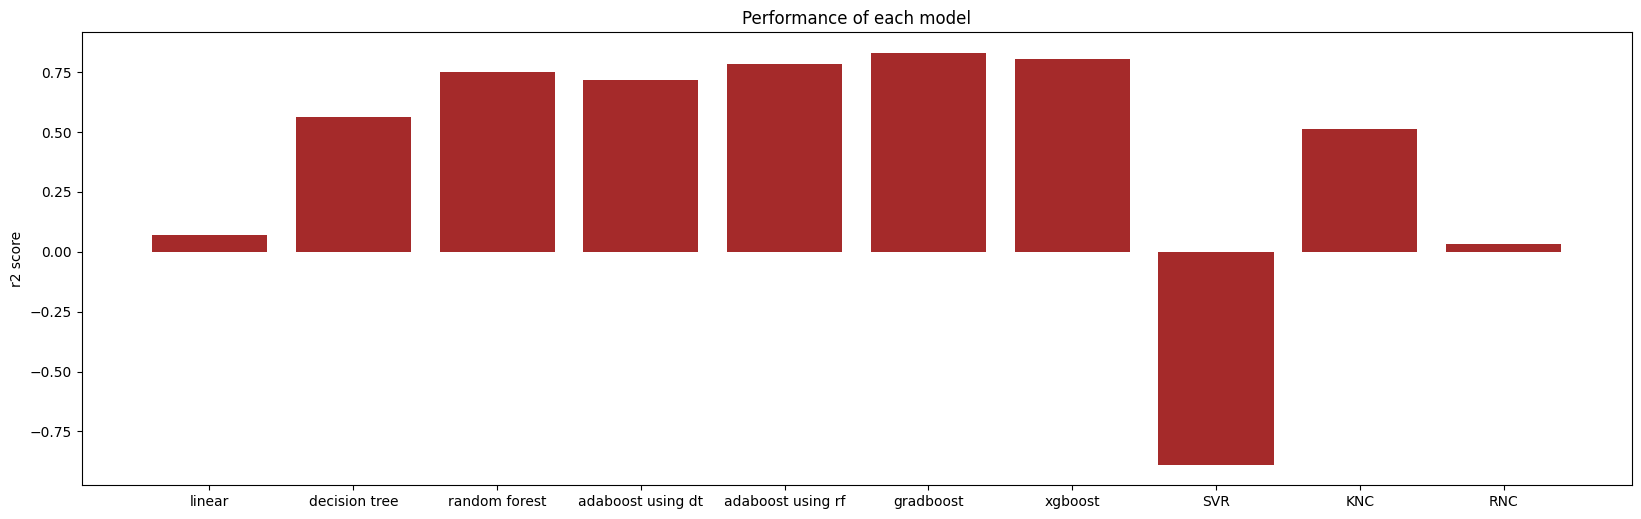

In [29]:
plt.figure(figsize=(20,6), dpi=100)
plt.bar( r2.keys(),r2.values(), color='brown', )
plt.ylabel('r2 score')
plt.title('Performance of each model')
plt.show()